# **Enhancing Customer Retention in the Cosmetics E-Commerce Industry**

## **Background**


### **Context** 

High-traffic cosmetics e-commerce platforms often face challenges where many users add products to their shopping carts but fail to complete their purchases. Understanding the underlying factors behind these abandoned transactions—such as pricing, brand loyalty, or other influences—can provide valuable insights to enhance customer retention.

### **Approach**
1. Analyzing customer behavior patterns to identify key factors influencing purchasing decisions.
1. Segmenting customers based on transaction trends to improve retention strategies.
1. Developing strategic recommendations to optimize e-commerce performance.


## **Import Package**

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

import plotly

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from operator import attrgetter


import warnings
warnings.filterwarnings('ignore')

## **Read Data**

In [ ]:
df=pd.read_parquet("compressed/Ecommerce.parquet")
df['event_time'] = pd.to_datetime(df['event_time'])

## **Identify and Clean Null Data**

In [ ]:
display(df.columns)

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [ ]:
# drop unnecessary variables
df.isna().sum()
df = df.drop("category_code", axis=1)
df = df.drop("user_session", axis=1)
display(((df.isna().sum())/len(df))*100)


event_time      0.000000
event_type      0.000000
product_id      0.000000
category_id     0.000000
brand          42.319551
price           0.000000
user_id         0.000000
dtype: float64

category_code and user_session are dropped because they are not used in the cohort analysis, as they do not represent unique identifiers and contain a significant amount of missing data.

In [ ]:
# drop duplicate
df.drop_duplicates(inplace=True)

## **Categorize Brand**

In [ ]:
# Get unique values from the "brand" column
unique_brands = df["brand"].unique()
len(unique_brands)

274

Next, we categorize the brands into their respective brand categories.

In [ ]:
brands_to_categories = {
    'f.o.x': 'Nail Care',
    'cnd': 'Nail Care',
    'runail': 'Nail Care',
    'freedecor': 'Nail Care',
    'nan': 'Nail Care',
    'ingarden': 'Skin Care',
    'roubloff': 'Nail Care',
    'metzger': 'Professional Tools',
    'staleks': 'Professional Tools',
    'zinger': 'Professional Tools',
    'yoko': 'Beauty & Cosmetics',
    'entity': 'Nail Care',
    'irisk': 'Nail Care',
    'beautix': 'Beauty & Cosmetics',
    'uno': 'Beauty & Cosmetics',
    'philips': 'Technology',
    'domix': 'Skin Care',
    'masura': 'Nail Care',
    'grattol': 'Nail Care',
    'strong': 'Nail Care',
    'skinlite': 'Skin Care',
    'nagaraku': 'Beauty & Cosmetics',
    'italwax': 'Skin Care',
    'max': 'Beauty & Cosmetics',
    'bluesky': 'Nail Care',
    'pole': 'Professional Tools',
    'cosmoprofi': 'Nail Care',
    'severina': 'Beauty & Cosmetics',
    'bpw.style': 'Beauty & Cosmetics',
    'igrobeauty': 'Beauty & Cosmetics',
    'smart': 'Technology',
    'coifin': 'Hair Care',
    'estel': 'Hair Care',
    'lador': 'Hair Care',
    'kapous': 'Hair Care',
    'sophin': 'Nail Care',
    'marathon': 'Professional Tools',
    'nitrimax': 'Nail Care',
    'jessnail': 'Nail Care',
    'jas': 'Beauty & Cosmetics',
    'de.lux': 'Beauty & Cosmetics',
    'haruyama': 'Nail Care',
    'orly': 'Nail Care',
    'lianail': 'Nail Care',
    'almea': 'Beauty & Cosmetics',
    'milv': 'Nail Care',
    'lakme': 'Beauty & Cosmetics',
    'concept': 'Beauty & Cosmetics',
    'pnb': 'Nail Care',
    'bodyton': 'Skin Care',
    'rosi': 'Beauty & Cosmetics',
    'petitfee': 'Skin Care',
    'polarus': 'Professional Tools',
    'lovely': 'Nail Care',
    'oniq': 'Nail Care',
    'provoc': 'Beauty & Cosmetics',
    'solomeya': 'Skin Care',
    'shik': 'Skin Care',
    'bioaqua': 'Skin Care',
    'art-visage': 'Beauty & Cosmetics',
    'refectocil': 'Beauty & Cosmetics',
    'freshbubble': 'Skin Care',
    'elskin': 'Skin Care',
    'swarovski': 'Jewelry & Accessories',
    'airnails': 'Nail Care',
    'kosmekka': 'Beauty & Cosmetics',
    'bergamo': 'Skin Care',
    'keen': 'Professional Tools',
    'gehwol': 'Skin Care',
    'kinetics': 'Nail Care',
    'estelare': 'Beauty & Cosmetics',
    'missha': 'Beauty & Cosmetics',
    'candy': 'Beauty & Cosmetics',
    'naomi': 'Beauty & Cosmetics',
    'thuya': 'Nail Care',
    'balbcare': 'Skin Care',
    'uskusi': 'Skin Care',
    'farmavita': 'Hair Care',
    'insight': 'Hair Care',
    'ardell': 'Beauty & Cosmetics',
    'limoni': 'Beauty & Cosmetics',
    'happyfons': 'Beauty & Cosmetics',
    'bespecial': 'Beauty & Cosmetics',
    'beauty-free': 'Beauty & Cosmetics',
    'carmex': 'Beauty & Cosmetics',
    'benovy': 'Beauty & Cosmetics',
    'browxenna': 'Beauty & Cosmetics',
    'dermal': 'Skin Care',
    'kiss': 'Beauty & Cosmetics',
    'lowence': 'Beauty & Cosmetics',
    'finish': 'Nail Care',
    'deoproce': 'Skin Care',
    'ecolab': 'Skin Care',
    'inm': 'Nail Care',
    'kaypro': 'Hair Care',
    'emil': 'Beauty & Cosmetics',
    'chi': 'Hair Care',
    'matrix': 'Hair Care',
    'zeitun': 'Beauty & Cosmetics',
    'mavala': 'Nail Care',
    'dizao': 'Skin Care',
    'meisterwerk': 'Professional Tools',
    'opi': 'Nail Care',
    'dewal': 'Professional Tools',
    's.care': 'Skin Care',
    'kocostar': 'Skin Care',
    'litaline': 'Skin Care',
    'lsanic': 'Skin Care',
    'mane': 'Hair Care',
    'kaaral': 'Hair Care',
    'konad': 'Nail Care',
    'markell': 'Skin Care',
    'artex': 'Skin Care',
    'consly': 'Skin Care',
    'shary': 'Beauty & Cosmetics',
    'lamixx': 'Hair Care',
    'levrana': 'Skin Care',
    'eunyul': 'Skin Care',
    'farmstay': 'Skin Care',
    'kamill': 'Skin Care',
    'elizavecca': 'Skin Care',
    'matreshka': 'Beauty & Cosmetics',
    'sanoto': 'Skin Care',
    'beauugreen': 'Beauty & Cosmetics',
    'koreatida': 'Beauty & Cosmetics',
    'jaguar': 'Professional Tools',
    'joico': 'Hair Care',
    'farmona': 'Skin Care',
    'sunuv': 'Professional Tools',
    'vosev': 'Beauty & Cosmetics',
    'greymy': 'Hair Care',
    'trind': 'Nail Care',
    'moyou': 'Nail Care',
    'coocla': 'Skin Care',
    'profhenna': 'Beauty & Cosmetics',
    'depilflax': 'Skin Care',
    'inoface': 'Skin Care',
    'miskin': 'Skin Care',
    'fancy': 'Beauty & Cosmetics',
    'i-laq': 'Nail Care',
    'laboratorium': 'Skin Care',
    'riche': 'Beauty & Cosmetics',
    'coxir': 'Skin Care',
    'foamie': 'Skin Care',
    'glysolid': 'Skin Care',
    'enigma': 'Beauty & Cosmetics',
    'parachute': 'Hair Care',
    'tertio': 'Skin Care',
    'lebelage': 'Skin Care',
    'nirvel': 'Hair Care',
    'beautyblender': 'Beauty & Cosmetics',
    'likato': 'Nail Care',
    'nitrile': 'Professional Tools',
    'siberina': 'Skin Care',
    'ypsed': 'Skin Care',
    'cutrin': 'Hair Care',
    'enas': 'Skin Care',
    'dr.gloderm': 'Skin Care',
    'osmo': 'Hair Care',
    'vilenta': 'Skin Care',
    'kims': 'Skin Care',
    'levissime': 'Skin Care',
    'keune': 'Hair Care',
    'yu-r': 'Skin Care',
    'mielle': 'Hair Care',
    'ecocraft': 'Skin Care',
    'treaclemoon': 'Skin Care',
    'latinoil': 'Hair Care',
    'cristalinas': 'Skin Care',
    'protokeratin': 'Hair Care',
    'godefroy': 'Beauty & Cosmetics',
    'blixz': 'Nail Care',
    'koelf': 'Skin Care',
    'tannymaxx': 'Skin Care',
    'soleo': 'Skin Care',
    'tosowoong': 'Skin Care',
    'ladykin': 'Skin Care',
    'supertan': 'Skin Care',
    'frozen': 'Beauty & Cosmetics',
    'fly': 'Beauty & Cosmetics',
    'bodipure': 'Skin Care',
    'fedua': 'Nail Care',
    'ovale': 'Beauty & Cosmetics',
    'nefertiti': 'Beauty & Cosmetics',
    'biofollica': 'Hair Care',
    'enjoy': 'Hair Care',
    'batiste': 'Hair Care',
    'profepil': 'Skin Care',
    'ellips': 'Hair Care',
    'dermacol': 'Beauty & Cosmetics',
    'zab': 'Beauty & Cosmetics',
    'kerasys': 'Hair Care',
    'egomania': 'Beauty & Cosmetics',
    'rocknailstar': 'Nail Care',
    'rasyan': 'Skin Care',
    'dorena': 'Beauty & Cosmetics',
    'aura': 'Beauty & Cosmetics',
    'plazan': 'Skin Care',
    'ibd': 'Nail Care',
    'sun': 'Skin Care',
    'sawa': 'Skin Care',
    'tazol': 'Skin Care',
    'veraclara': 'Beauty & Cosmetics',
    'marutaka-foot': 'Foot Care',
    'naturmed': 'Skin Care',
    'binacil': 'Hair Care',
    'essie': 'Nail Care',
    'bosnic': 'Beauty & Cosmetics',
    'barbie': 'Beauty & Cosmetics',
    'cosima': 'Beauty & Cosmetics',
    'australis': 'Beauty & Cosmetics',
    'koelcia': 'Beauty & Cosmetics',
    'skipofit': 'Skin Care',
    'voesh': 'Nail Care',
    'kares': 'Skin Care',
    'grace': 'Beauty & Cosmetics',
    'cruset': 'Skin Care',
    'neoleor': 'Skin Care',
    'biore': 'Skin Care',
    'skinity': 'Skin Care',
    'weaver': 'Hair Care',
    'juno': 'Beauty & Cosmetics',
    'busch': 'Professional Tools',
    'andrea': 'Beauty & Cosmetics',
    'kezy': 'Beauty & Cosmetics',
    'eos': 'Skin Care',
    'blise': 'Beauty & Cosmetics',
    'labay': 'Beauty & Cosmetics',
    'esquire': 'Beauty & Cosmetics',
    'barex': 'Hair Care',
    'radius': 'Oral Care',
    'invisibobble': 'Hair Care',
    'embryolisse': 'Skin Care',
    'uralsoap': 'Skin Care',
    'lunaris': 'Beauty & Cosmetics',
    'helloganic': 'Skin Care',
    'cuccio': 'Nail Care',
    'dartnails': 'Nail Care',
    'laiseven': 'Skin Care',
    'mayamy': 'Nail Care',
    'ikoo': 'Hair Care',
    'estrade': 'Beauty & Cosmetics',
    'biorepair': 'Skin Care',
    'macadamia': 'Hair Care',
    'babyliss': 'Hair Care',
    'yllozure': 'Beauty & Cosmetics',
    'relouis': 'Beauty & Cosmetics',
    'avene': 'Skin Care',
    'ermine': 'Beauty & Cosmetics',
    'beautific': 'Skin Care',
    'herbolive': 'Skin Care',
    'shifei': 'Skin Care',
    'dessata': 'Hair Care',
    'footlogix': 'Foot Care',
    'nova': 'Beauty & Cosmetics',
    'vl-gel': 'Nail Care',
    'pueen': 'Nail Care',
    'gena': 'Skin Care',
    'bielenda': 'Skin Care',
    'arganoil': 'Hair Care',
    'gezatone': 'Beauty & Cosmetics',
    'kondor': 'Professional Tools',
    'termix': 'Hair Care',
    'vichy': 'Skin Care',
    'luxvisage': 'Beauty & Cosmetics',
    'bioderma': 'Skin Care',
    'note': 'Beauty & Cosmetics',
    'dancoly': 'Beauty & Cosmetics',
    'everyang': 'Skin Care',
    'rorec': 'Skin Care',
    'pilaten': 'Skin Care',
    'dobrovit': 'Skin Care',
    'cettua': 'Skin Care',
    'resize': 'Skin Care'
}

In [ ]:
df['brand_category'] = df['brand'].map(brands_to_categories)

# Check the result
df

event_time        event_type  product_id  \
0        2019-12-01 00:00:00+00:00  remove_from_cart     5712790   
1        2019-12-01 00:00:00+00:00              view     5764655   
2        2019-12-01 00:00:02+00:00              cart        4958   
3        2019-12-01 00:00:05+00:00              view     5848413   
4        2019-12-01 00:00:07+00:00              view     5824148   
...                            ...               ...         ...   
20692834 2020-01-31 23:59:52+00:00              view     5796984   
20692835 2020-01-31 23:59:52+00:00  remove_from_cart     5886774   
20692837 2020-01-31 23:59:53+00:00              view     5875432   
20692838 2020-01-31 23:59:57+00:00  remove_from_cart     5820745   
20692839 2020-01-31 23:59:58+00:00  remove_from_cart     5820745   

                  category_id      brand  price    user_id brand_category  
0         1487580005268456287      f.o.x   6.27  576802932      Nail Care  
1         1487580005411062629        cnd  29.05  412120092      Nail Care  
2         1487580009471148064     runail   1.19  494077766      Nail Care  
3         1487580007675986893  freedecor   0.79  348405118      Nail Care  
4         1487580005511725929       None   5.56  576005683            NaN  
...                       ...        ...    ...        ...            ...  
20692834  1487580005671109489     masura   1.73  417102560      Nail Care  
20692835  1487580006317032337       None   1.59  607092857            NaN  
20692837  2084144451428549153       None   2.05  423651741            NaN  
20692838  1487580006317032337       None   2.22  607092857            NaN  
20692839  1487580006317032337       None   2.22  607092857            NaN  

[19571891 rows x 8 columns]

In this step, we remove rows where the values for brand and brand_category are missing (null). This is done to ensure data quality and consistency in the analysis.

In [ ]:
display(round(((df.isna().sum())/len(df))*100,2))
df.dropna(subset=['brand', 'brand_category'], inplace=True)
display(round(((df.isna().sum())/len(df))*100,2))

event_time         0.0
event_type         0.0
product_id         0.0
category_id        0.0
brand             42.2
price              0.0
user_id            0.0
brand_category    42.2
dtype: float64

event_time        0.0
event_type        0.0
product_id        0.0
category_id       0.0
brand             0.0
price             0.0
user_id           0.0
brand_category    0.0
dtype: float64

## **Exploratory Data Analysis (EDA) All Data**

### **By Event**

In [ ]:
df_statistik = df.groupby(['brand_category', 'event_type'])['user_id'].count().reset_index()

In [ ]:
df_statistik

brand_category        event_type  user_id
0      Beauty & Cosmetics              cart   533341
1      Beauty & Cosmetics          purchase   133088
2      Beauty & Cosmetics  remove_from_cart   259585
3      Beauty & Cosmetics              view  1023938
4               Foot Care              cart      134
5               Foot Care          purchase       21
6               Foot Care  remove_from_cart       52
7               Foot Care              view      623
8               Hair Care              cart   203757
9               Hair Care          purchase    44888
10              Hair Care  remove_from_cart    86262
11              Hair Care              view   562062
12  Jewelry & Accessories              cart    15077
13  Jewelry & Accessories          purchase     4031
14  Jewelry & Accessories  remove_from_cart     8993
15  Jewelry & Accessories              view    12900
16              Nail Care              cart  1858772
17              Nail Care          purchase   415119
18              Nail Care  remove_from_cart  1022207
19              Nail Care              view  2988498
20              Oral Care              cart       32
21              Oral Care          purchase        5
22              Oral Care  remove_from_cart        8
23              Oral Care              view      224
24     Professional Tools              cart   155466
25     Professional Tools          purchase    35162
26     Professional Tools  remove_from_cart    81714
27     Professional Tools              view   361473
28              Skin Care              cart   433174
29              Skin Care          purchase   100515
30              Skin Care  remove_from_cart   218089
31              Skin Care              view   714015
32             Technology              cart    14113
33             Technology          purchase     3825
34             Technology  remove_from_cart     6395
35             Technology              view    15806

In [ ]:
import plotly.graph_objects as go

colors = ["darkgreen","seagreen","mediumseagreen","limegreen"]

funnel_data = df[df['event_type'].isin(['cart', 'remove_from_cart', 'purchase', "view"])] \
    .groupby('event_type')['user_id'].nunique().reset_index(name='unique_users')

event_order = ["view", 'cart', 'remove_from_cart', 'purchase']
funnel_data['event_type'] = pd.Categorical(funnel_data['event_type'], categories=event_order, ordered=True)
funnel_data.sort_values('event_type', inplace=True)

fig = go.Figure(go.Funnelarea(
    values=funnel_data['unique_users'],
    text=funnel_data['event_type'],
    marker=dict(colors=colors)
))

fig.update_layout(
    title={
        'text': "Funnel View: View → Cart → Remove from Cart → Purchase",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

**Conversion Analysis Based on the Funnel Plot**
Based on the funnel plot above, we can observe that the conversion rate is significantly lower compared to the initial stage of the customer journey. The user journey from viewing a product to completing a purchase follows these stages:

- **View**: 67.1%
- **Cart**: 18.3%
- **Remove from Cart**: 8.82%
- **Purchase**: 5.7%

From this data, we can conclude that only a small percentage of users (5.7%) ultimately complete a purchase out of the total users who initially viewed the product (67.1%). There is a significant drop-off from the View stage to Cart, and an even further decline to Purchase.

**Key Insights:**

- **Low Conversion Rate**: A very small percentage of users proceed from product viewing to actual purchase.
- **Significant Drop-Off**: The largest decline occurs between the View and Cart stages, indicating potential challenges in persuading users to add products to their carts.
- **Optimization Opportunities**: The results suggest possible friction points in the user experience or purchasing process that may need to be addressed.

Enhancing the user experience and identifying obstacles in the purchasing journey can help improve the conversion rate and overall e-commerce performance.

In [ ]:
df['event_month'] = df['event_time'].dt.to_period('W')  
event_time_series = df.groupby(['event_month', 'event_type']).size().reset_index(name='count')
event_time_series['event_month'] = event_time_series['event_month'].astype(str)

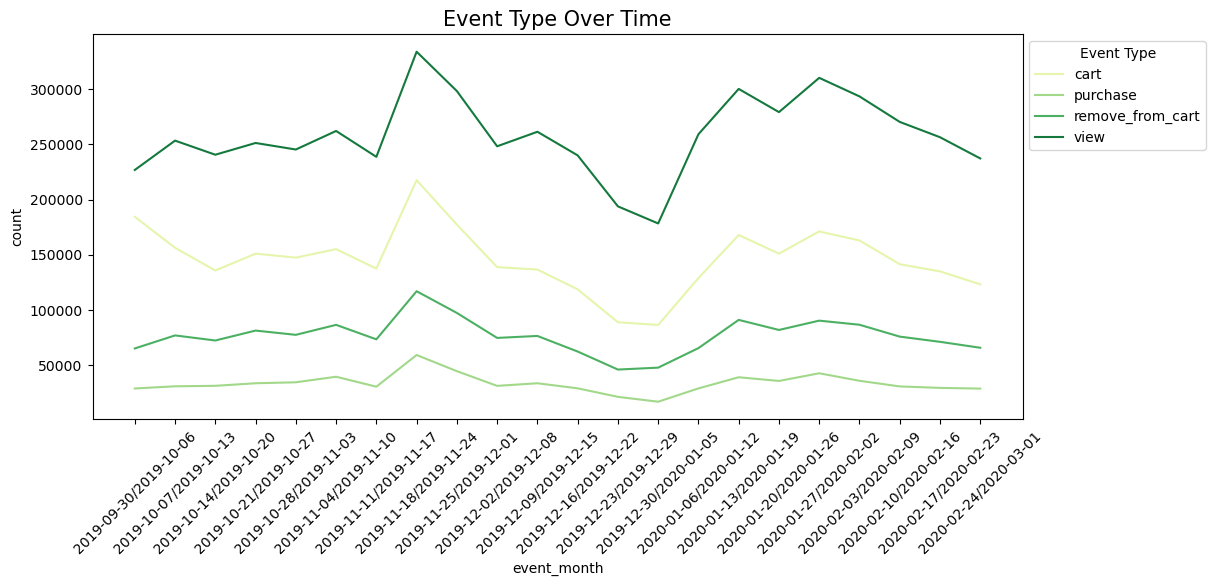

In [ ]:
plt.figure(figsize=(12, 5)) 

sns.lineplot(
    data=event_time_series, 
    x='event_month',  
    y='count',  
    hue='event_type',
    palette='YlGn',   
    ci=None  
)

plt.style.use('default')
plt.title('Event Type Over Time', size=15)
plt.xticks(rotation=90)
plt.grid(False)
plt.legend(title='Event Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation = 45)
plt.show()

**Weekly Trends in Event Types**

**Key insights from the trend graph:**

**Event "View":**

- Recorded the highest count throughout the observed period.
- Reached its peak around mid-November 2019.

**Event "Purchase":**

- Shows a peak occurring close to the peak of "View," also around mid-November 2019.
- The count is significantly lower than "View."

**Event "Cart":**

- Lower in volume compared to both "View" and "Purchase."
- Displays a slight increase around mid-November 2019.

**Event "Remove from Cart":**

- Has the lowest count among all event types.

**Insight Tambahan:**

- There is a visible correlation between these four event types in the customer journey.
- The peak activity in mid-November 2019 may be associated with a specific event or promotional campaign.
- Optimizing the user experience at the Cart and Purchase stages could help improve conversion rates and drive more successful transactions.

### **By Price**

In [ ]:
purchase_data = df[df['event_type'] == 'purchase']

user_purchase_analysis = purchase_data.groupby('user_id').agg(
    total_purchases=('user_id', 'count'),
    total_revenue=('price', 'sum'),
    average_purchase_value=('price', 'mean'),
    unique_products=('product_id', 'nunique')
).reset_index()

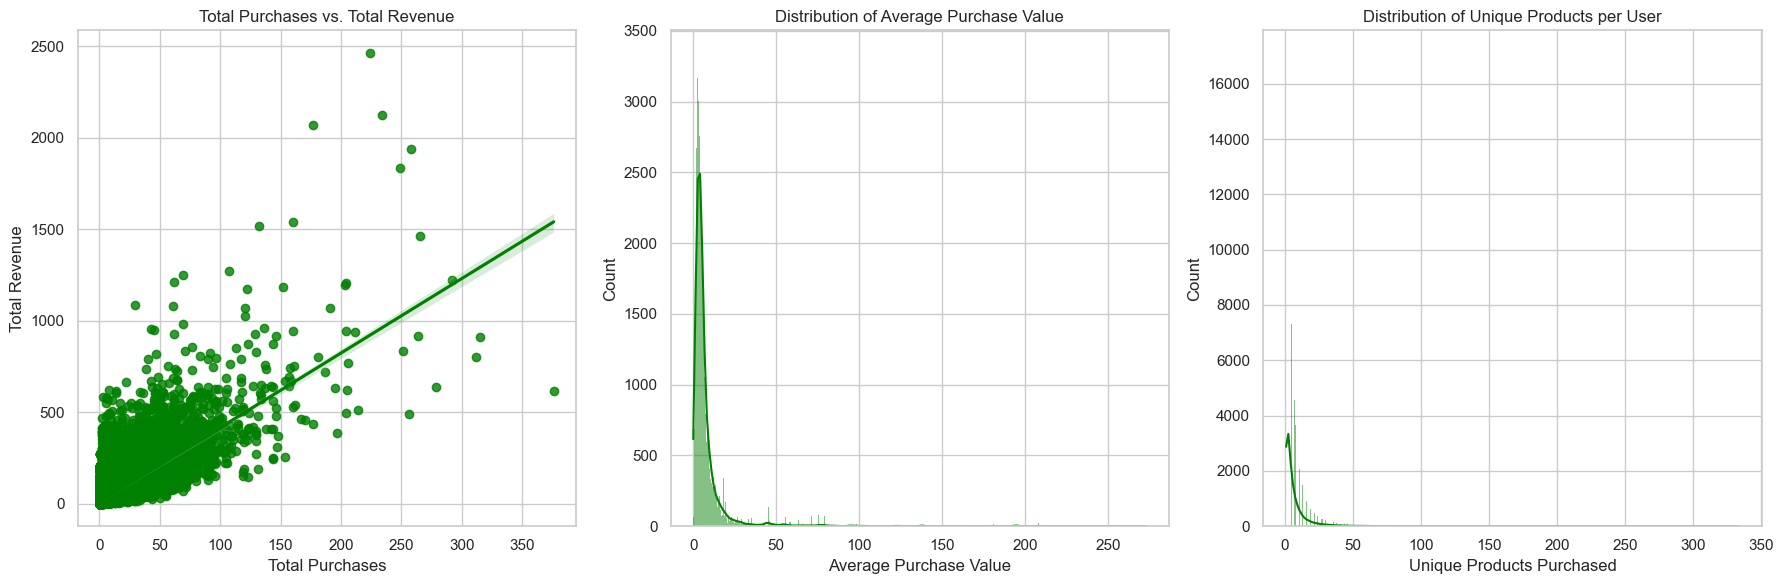

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot 
sns.regplot(x='total_purchases', y='total_revenue', data=user_purchase_analysis, ax=axes[0], scatter_kws={'color': 'green'}, line_kws={'color': 'green'})
axes[0].set_title('Total Purchases vs. Total Revenue')
axes[0].set_xlabel('Total Purchases')
axes[0].set_ylabel('Total Revenue')

# Histogram 
sns.histplot(user_purchase_analysis['average_purchase_value'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Average Purchase Value')
axes[1].set_xlabel('Average Purchase Value')

# Histogram 
sns.histplot(user_purchase_analysis['unique_products'], kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Unique Products per User')
axes[2].set_xlabel('Unique Products Purchased')

plt.tight_layout()
plt.show()

**Correlation Between Total Purchases and Total Revenue**

**Total Purchases vs. Total Revenue**

Key Insights from the Plot:

- **Positive Correlation**:

    There is a positive correlation between total purchases and total revenue. This indicates that an increase in the number of purchases generally leads to higher revenue.

- **Data Variability**:

    While the overall trend is positive, there is considerable variability in the data. Some data points show high revenue despite a relatively low number of purchases, and vice versa.

- **Data Density**:

    The majority of data points are concentrated in the range of 0-100 total purchases and 0-500 total revenue, suggesting that most transactions fall within this range.
    
- **Outliers**:

    There are some outliers with exceptionally high total purchases and revenue, which may require further investigation to understand the underlying causes.


**Distribution of Average Purchase Value**

Key Insights from the Plot:

- **Low Average Purchase Value:**
    Most purchases have an average value between 0 and 50, indicating that the majority of transactions involve low-value purchases.

- **Peak at Low Values:**
    The highest peak occurs at very low average purchase values, confirming that small-value transactions dominate the dataset.

- **Right-Skewed Distribution:**
    The distribution is right-skewed, meaning that while most purchases have a low value, there are a few transactions with significantly higher values.

- **Common Purchase Pattern:**
    This pattern is typical in e-commerce, where the majority of transactions involve low-cost items, with only a small proportion of users making high-value purchases.

**Distribution of Unique Products per User**

Key Insights from the Plot:

- **Main Distribution:**

    Most users purchase only a small number of unique products, with the peak of the distribution occurring around 0 to 10 unique products per user.

- **Buying Behavior:**

    The majority of customers tend to buy a limited variety of products, while only a small fraction of users purchase a large number of unique items.

This analysis highlights key consumer purchasing behaviors and provides insights into optimizing sales strategies to improve revenue generation and customer engagement.

In [ ]:
df.groupby('event_type')['price'].describe()

count       mean        std   min   25%   50%    75%  \
event_type                                                                   
cart              3213866.0   5.545089  11.753146  0.06  1.67  3.17   5.56   
purchase           736654.0   5.137926  10.039598  0.06  1.59  3.02   5.38   
remove_from_cart  1683305.0   5.569024  11.545228  0.06  1.73  3.57   5.56   
view              5679539.0  13.854947  28.095242  0.00  2.78  5.24  10.32   

                     max  
event_type                
cart              327.78  
purchase          327.78  
remove_from_cart  327.78  
view              327.78

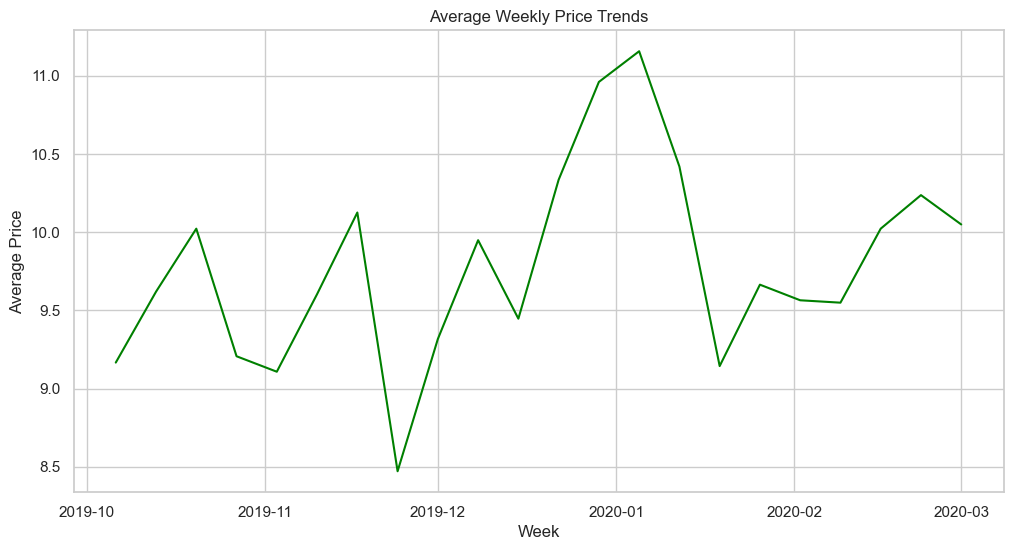

In [ ]:
price_trend_weekly = df.resample('W', on='event_time')['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=price_trend_weekly, 
    x='event_time', 
    y='price',
    color='green'
    )
plt.title("Average Weekly Price Trends")
plt.xlabel('Week')
plt.ylabel('Average Price')
plt.show()

**Key Insights from the Plot:**

- **Initial Fluctuations (October 1, 2019 – October 30, 2019)**:

    The average price started around 9.5, increased to approximately 10.0, then dropped below 9.0, before recovering to around 10.0.

- **Significant Decline (November 1, 2019 – November 30, 2019)**:

    A sharp decline was observed, with the average price falling below 8.5 by the end of November and into early December 2019.

- **Sharp Increase (December 1, 2019 – December 30, 2019)**:

    Following the decline, the average price surged significantly, peaking at approximately 11.0 in January 2020.

- **Subsequent Decline (January 1, 2020 – January 30, 2020)**:
    
    After reaching its peak, the average price dropped notably to around 9.0 by February 2020.

- **Moderate Recovery (February 1, 2020 – February 30, 2020)**:

    The average price showed a moderate recovery, climbing back to approximately 10.0 before slightly decreasing again toward March 2020.


This analysis highlights key price trends over time, indicating periods of volatility and potential external factors influencing price fluctuations.

### **By Category**

In [ ]:
df_statistik['total_users'] = df_statistik.groupby('brand_category')['user_id'].transform('sum')
df_statistik['percentage'] = (df_statistik['user_id'] / df_statistik['total_users']) * 100
pivot_data_percentage = df_statistik.pivot_table(index='brand_category', columns='event_type', values='percentage', aggfunc='sum', fill_value=0)

<Figure size 1200x600 with 0 Axes>

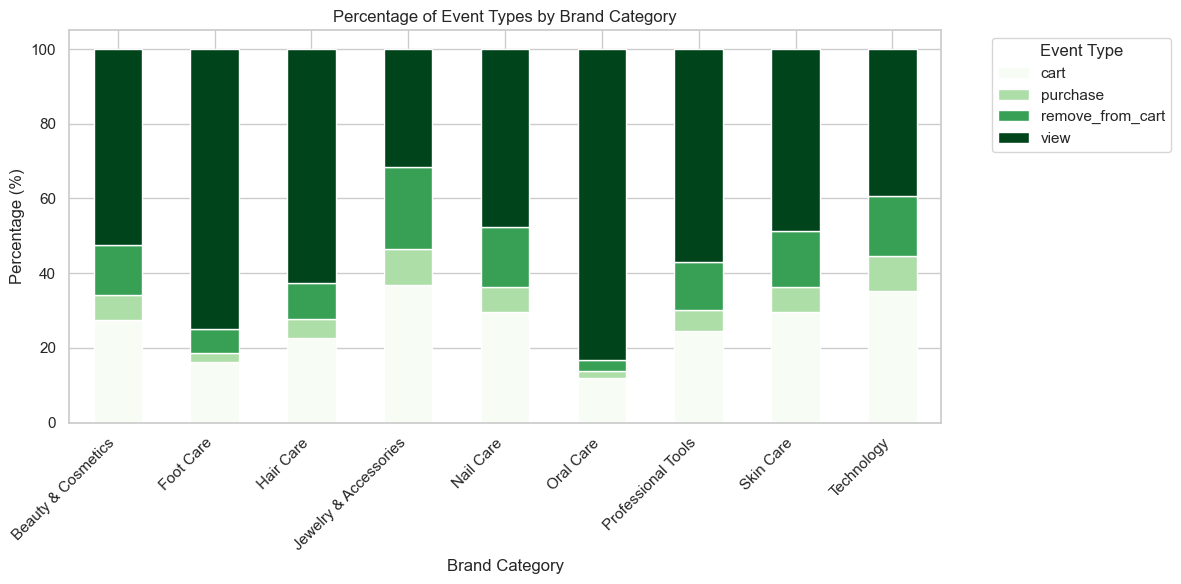

In [ ]:
plt.figure(figsize=(12, 6))
pivot_data_percentage.plot(kind='bar', stacked=True, colormap='Greens', figsize=(12, 6))

plt.title('Percentage of Event Types by Brand Category')
plt.xlabel('Brand Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Key Insights from the Plot:**

**Beauty & Cosmetics**

- View: This category dominates with a very high percentage of views, indicating strong interest in beauty and cosmetic products.
- Purchase: Despite high viewership, the purchase percentage is relatively low, suggesting potential for conversion improvement.

**Foot Care**
- View: Frequently viewed but still lower compared to the "Beauty & Cosmetics" category.
- Purchase: Lower purchase rate, possibly due to the niche nature of foot care products and their less frequent need.

**Hair Care**

- View: A significant number of views indicate strong interest in hair care products.
- Purchase: Moderate purchase percentage, suggesting a good sales potential.

**Jewelry & Accessories**

- View: High viewership indicates a strong interest in accessories and jewelry.
- Purchase: The purchase rate is lower, likely due to price sensitivity or specific customer preferences.

**Nail Care**

- View: Frequently viewed, but not as much as other categories.
- Purchase: Low purchase rate, highlighting the need for stronger marketing campaigns.

**Oral Care**

- View: This category has a high number of views, showing considerable interest in oral care products.
- Purchase: The purchase rate is relatively low compared to the views, indicating room for conversion optimization.

**Professional Tools**

- View: Despite being frequently viewed, this category has a lower percentage of views compared to others.
- Purchase: Interestingly, the purchase percentage is relatively high, suggesting that professional tools attract a more specific target audience that is ready to buy.

**Skin Care**

- View: One of the most viewed categories, highlighting strong consumer interest in skincare products.
- Purchase: The purchase rate is also relatively high, indicating a good conversion from views to purchases.

**Technology**

- View: Highly viewed, indicating a strong interest in technology-related products.
- Purchase: Lower purchase rates, possibly due to higher price points or longer decision-making cycles.


These insights help identify opportunities to improve conversion rates and refine marketing strategies for different product categories.

In [ ]:
category_event_counts = df.groupby(['brand_category', 'event_type']).size().reset_index(name='count')
purchase_counts = category_event_counts[category_event_counts['event_type'] == 'purchase']
purchase_counts_sorted = purchase_counts.groupby('brand_category')['count'].sum().sort_values(ascending=False).reset_index()
category_order = purchase_counts_sorted['brand_category']
purchase_counts['brand_category'] = pd.Categorical(purchase_counts['brand_category'], categories=category_order, ordered=True)
purchase_counts_sorted = purchase_counts.sort_values('brand_category', ascending=True)
purchase_counts_sorted['cumulative_count'] = purchase_counts_sorted['count'].cumsum()
purchase_counts_sorted['cumulative_percentage'] = 100 * purchase_counts_sorted['cumulative_count'] / purchase_counts_sorted['count'].sum()

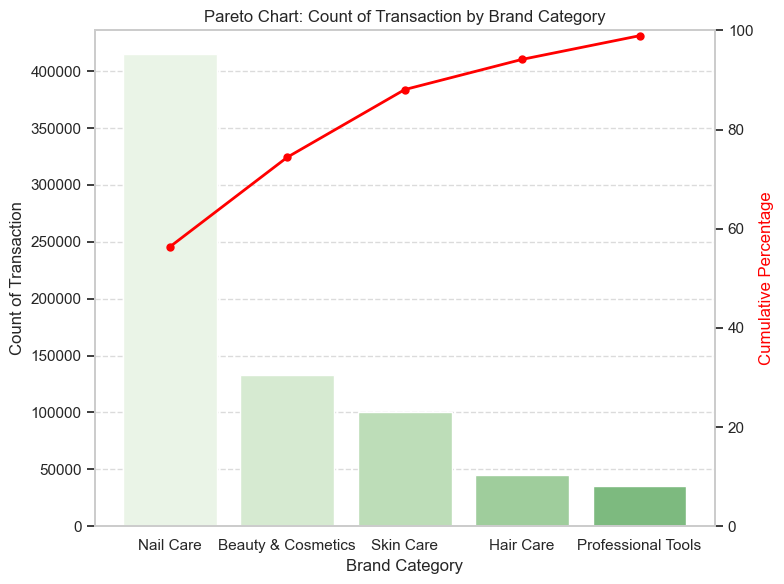

In [ ]:
top_5_counts = purchase_counts_sorted.head(5)
fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(
    data=top_5_counts, 
    x='brand_category', 
    y='count', 
    palette='Greens', 
    ax=ax1
)
ax1.set_xlabel('Brand Category')
ax1.set_ylabel('Count of Transaction')
ax1.set_title('Pareto Chart: Count of Transaction by Brand Category')

ax2 = ax1.twinx()

ax2.plot(
    top_5_counts['brand_category'], 
    top_5_counts['cumulative_percentage'], 
    color='red', 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    markersize=5
)

ax2.set_ylabel('Cumulative Percentage', color='red')
ax2.set_ylim(0, 100)  

ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(False)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Pareto Chart: Count of Transactions by Brand Category**

**Key Insights from the Chart (Top 80% Contributors):**

- Nail Care
    - Contributes the highest number of transactions.
    - Accounts for a significant share of total sales volume.

- Beauty & Cosmetics
    - Ranks second in transaction count.
    - Plays a major role in overall sales contribution.

- Skin Care
    - Holds the third position in transaction volume.
    - Completes the 80% cumulative threshold along with Nail Care and Beauty & Cosmetics.

Conclusion:
- These three categories (Nail Care, Beauty & Cosmetics, and Skin Care) collectively account for 80% of total transactions.
- Business strategies should prioritize these categories for marketing, promotions, and inventory management to maximize revenue impact.

In [ ]:
category_event_counts = df.groupby(['brand_category', 'event_type'])['user_id'].nunique().reset_index(name='unique_users')
purchase_counts = category_event_counts[category_event_counts['event_type'] == 'purchase']
purchase_counts_sorted = purchase_counts.groupby('brand_category')['unique_users'].sum().sort_values(ascending=False).reset_index()
category_order = purchase_counts_sorted['brand_category']
purchase_counts['brand_category'] = pd.Categorical(purchase_counts['brand_category'], categories=category_order, ordered=True)
purchase_counts_sorted = purchase_counts.sort_values('brand_category', ascending=True)
purchase_counts_sorted['cumulative_count'] = purchase_counts_sorted['unique_users'].cumsum()
purchase_counts_sorted['cumulative_percentage'] = 100 * purchase_counts_sorted['cumulative_count'] / purchase_counts_sorted['unique_users'].sum()

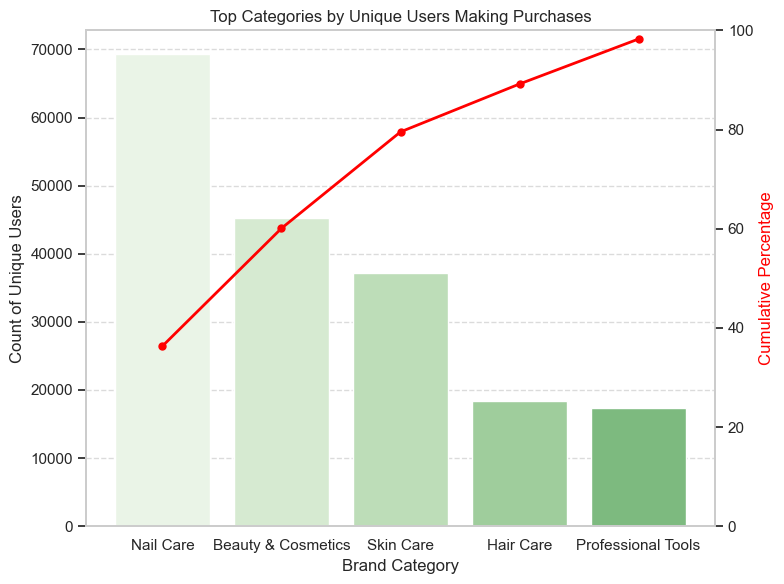

In [ ]:
top_5_counts = purchase_counts_sorted.head(5)
fig, ax1 = plt.subplots(figsize=(8, 6))

sns.barplot(
    data=top_5_counts, 
    x='brand_category', 
    y='unique_users', 
    palette='Greens', 
    ax=ax1
)
ax1.set_xlabel('Brand Category')
ax1.set_ylabel('Count of Unique Users')
ax1.set_title('Top Categories by Unique Users Making Purchases')
ax2 = ax1.twinx()

ax2.plot(
    top_5_counts['brand_category'], 
    top_5_counts['cumulative_percentage'], 
    color='red', 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    markersize=5
)

ax2.set_ylabel('Cumulative Percentage', color='red')
ax2.set_ylim(0, 100) 
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(False)


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Top Categories by Unique Users Making Purchases**
**Key Insights (Top 80% Contributors):**

- **Nail Care**
    - Has the highest number of unique users (~70,000).
    - Dominates the market, indicating strong popularity and demand.

- **Beauty & Cosmetics**
    - Ranks second with ~50,000 unique users.
    - Shows significant interest, making it a key category.

- **Skin Care**
    - Holds the third position with ~40,000 unique users.
    - Demonstrates a wide consumer base and strong demand.

Conclusion:
- Nail Care, Beauty & Cosmetics, and Skin Care collectively account for 80% of unique users making purchases.
- These categories should be prioritized for targeted marketing, promotions, and product expansion to drive further engagement and sales.

In [ ]:
category_event_sums = df.groupby(['brand_category', 'event_type'])['price'].sum().reset_index(name='total_price')
purchase_sums = category_event_sums[category_event_sums['event_type'] == 'purchase']
purchase_sums_sorted = purchase_sums.groupby('brand_category')['total_price'].sum().sort_values(ascending=False).reset_index()
purchase_sums_sorted['cumulative_price'] = purchase_sums_sorted['total_price'].cumsum()
purchase_sums_sorted['cumulative_percentage'] = 100 * purchase_sums_sorted['cumulative_price'] / purchase_sums_sorted['total_price'].sum()

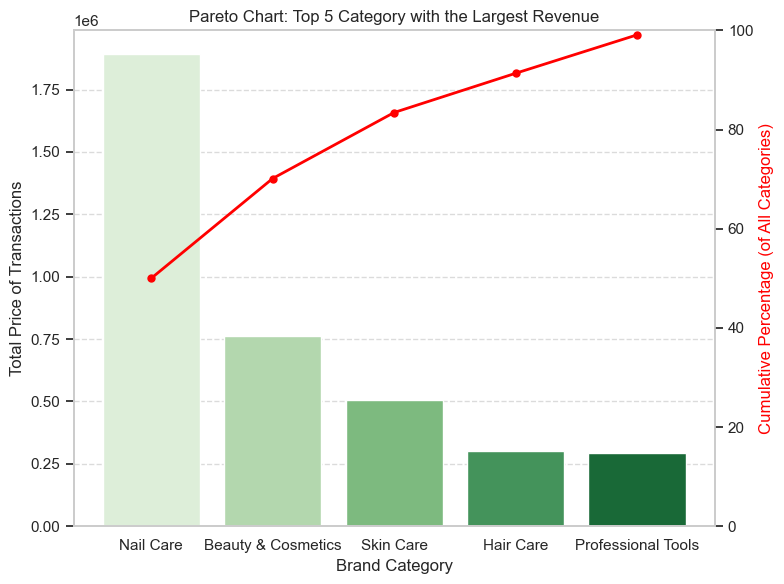

In [ ]:
top_5_sums = purchase_sums_sorted.head(5)
fig, ax1 = plt.subplots(figsize=(8, 6))

sns.barplot(
    data=top_5_sums, 
    x='brand_category', 
    y='total_price', 
    palette='Greens', 
    ax=ax1
)
ax1.set_xlabel('Brand Category')
ax1.set_ylabel('Total Price of Transactions')
ax1.set_title('Pareto Chart: Top 5 Category with the Largest Revenue')
ax2 = ax1.twinx()

ax2.plot(
    top_5_sums['brand_category'], 
    top_5_sums['cumulative_percentage'], 
    color='red', 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    markersize=5
)

ax2.set_ylabel('Cumulative Percentage (of All Categories)', color='red')
ax2.set_ylim(0, 100)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Pareto Chart: Top Categories Contributing to 80% of Revenue**
**Key Insights (Top 80% Contributors):**

- **Nail Care**
    - Generates the highest revenue among all categories.
    - Highly popular and significantly contributes to total earnings.

- **Beauty & Cosmetics**
    - Ranks second in total revenue.
    - Strong market presence and consistent performance.
    
- **Skin Care**
    - Holds the third position in revenue contribution.
    - Shows high consumer demand and revenue impact.

**Conclusion:**
- Nail Care, Beauty & Cosmetics, and Skin Care collectively contribute to 80% of total revenue.
- Business efforts should focus on these categories for strategic promotions, inventory prioritization, and pricing optimization to maximize revenue growth.

In [ ]:
purchase_data = df[df['event_type'] == 'purchase']

user_categories = purchase_data.groupby('user_id')['brand_category'].nunique()

users_multiple_categories = user_categories[user_categories > 1]

num_users_multiple_categories = users_multiple_categories.count()

print(f"Number of users who purchased from more than one category: {num_users_multiple_categories}")


Number of users who purchased from more than one category: 56087


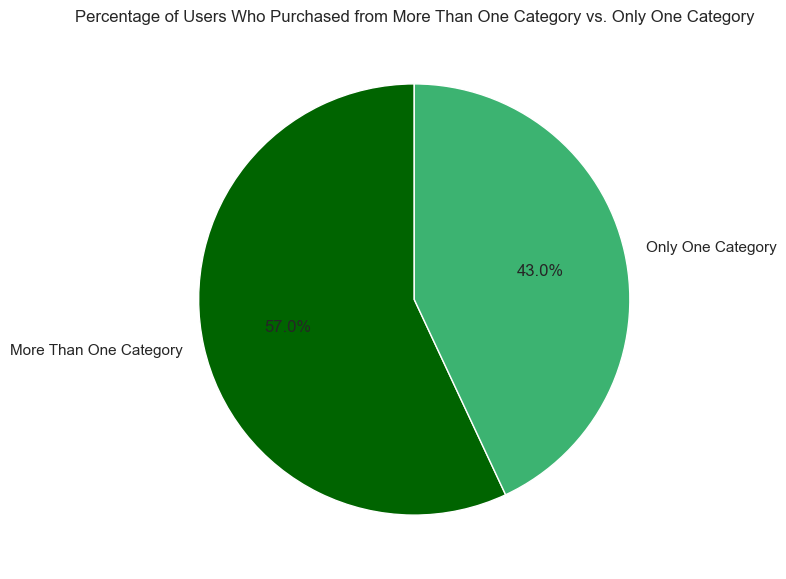

In [ ]:
purchase_data = df[df['event_type'] == 'purchase']
user_categories = purchase_data.groupby('user_id')['brand_category'].nunique()

users_multiple_categories = user_categories[user_categories > 1]

users_single_category = user_categories[user_categories == 1]

num_users_multiple_categories = users_multiple_categories.count()
num_users_single_category = users_single_category.count()

labels = ['More Than One Category', 'Only One Category']
sizes = [num_users_multiple_categories, num_users_single_category]
colors = ['darkgreen', 'mediumseagreen']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Percentage of Users Who Purchased from More Than One Category vs. Only One Category')
plt.show()


**Percentage of Users Purchasing from Multiple vs Single Categories**
**Key Insights:**

- **Majority of Users Purchase from Multiple Categories**
    - 57.0% of users buy from more than one category.
    - Indicates strong cross-category interest among customers.

- **Single-Category Purchases Still Significant**
    - 43.0% of users purchase from only one category.
    - Represents a notable segment that may benefit from targeted promotions.

**Strategic Takeaways:**

- **Product Diversification Matters**
    - Offering a broad range of products across categories can encourage more purchases.

- **Cross-Category Marketing is Essential**
    - Bundling products and cross-promotions can increase overall sales.
    - Personalized recommendations based on multi-category shopping behavior can drive engagement.

### **By Brand**

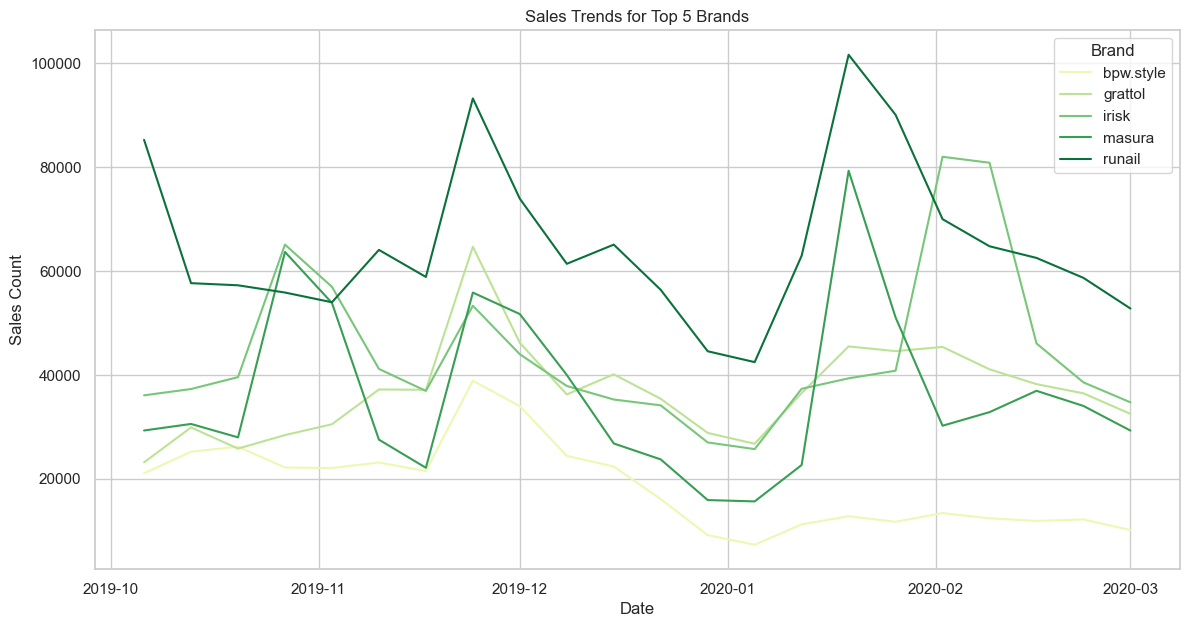

In [ ]:
top_brands_by_sales = df['brand'].value_counts().reset_index()
top_brands_by_sales.columns = ['brand', 'sales_count']
top_5_brands = top_brands_by_sales.head(5)['brand']
df_top_brands = df[df['brand'].isin(top_5_brands)]
sales_trends = df_top_brands.groupby([pd.Grouper(key='event_time', freq='W'), 'brand']).size().reset_index(name='sales_count')
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=sales_trends, 
    x='event_time', 
    y='sales_count', 
    hue='brand',
    palette='YlGn'
    )
plt.title("Sales Trends for Top 5 Brands")
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.legend(title='Brand')
plt.show()
top_brands_by_sales = df['brand'].value_counts().reset_index()
top_brands_by_sales.columns = ['brand', 'sales_count']

**Top 5 Brand Trends Over Time**
**Key Insights:**

- **Sales Fluctuations Across All Brands**
    - No single brand maintains a consistent upward or downward trend.
    - All brands experience noticeable variations in sales over time.

- **Sales Peaks at Different Periods**
    - Masura & Irisk show significant sales spikes in early 2020.
    - Other brands display their own unique peak periods.

- **Sales Declines After Peaks**
    - Masura & Irisk experience steep drops after their peak sales periods.
    - Indicates possible seasonal trends or short-lived promotions.

- **Brand Comparisons**
    - bpw.style consistently has lower sales than other brands.
    - Masura & Irisk show the highest variability in sales trends, while Grattol is relatively more stable.

**Strategic Takeaways:**

- Understand Peak Periods: Identifying what drives sales spikes can help replicate success through promotions or seasonal campaigns.
- Address Sales Declines: Investigating factors behind post-peak declines can help sustain momentum.
- Tailored Marketing Strategies: High-variability brands may require aggressive promotions, while stable brands can benefit from steady engagement strategies.

In [ ]:
brand_by_profit = df.groupby("brand")["price"].sum().sort_values(ascending=False).head(5)
brand_by_profit_df = brand_by_profit.reset_index()
brand_by_profit_df.rename(columns={"price": "profit"}, inplace=True)

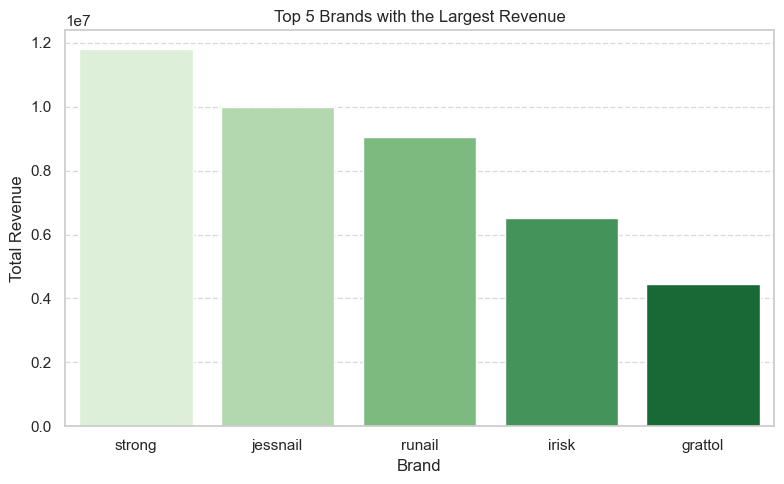

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=brand_by_profit_df, 
    x='brand', 
    y='profit', 
    palette='Greens'
)
plt.title('Top 5 Brands with the Largest Revenue', size=12)
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Top 5 Brands with the Largest Revenue**
**Key Insights:**

- **Brand Dominance:**
    - Brand "Strong" leads significantly in total revenue, outperforming all other brands.
    - This dominance indicates a strong market presence and customer preference.

- **Significant Revenue Gap**
    - There is a substantial gap between Brand "Strong" and the other four brands.
    - This suggests varying financial performance and market reach among competitors.

**Strategic Takeaways:**

**Leverage Market Leadership**
- Brand "Strong" can capitalize on its dominance through expansion, premium offerings, or reinforcing brand loyalty.


**Address Revenue Disparities**

- Competitor brands may need to analyze pricing, marketing, or product strategies to close the revenue gap.

**Competitive Positioning**

- Brands with lower revenue can focus on differentiation, niche targeting, or strategic partnerships to boost sales.

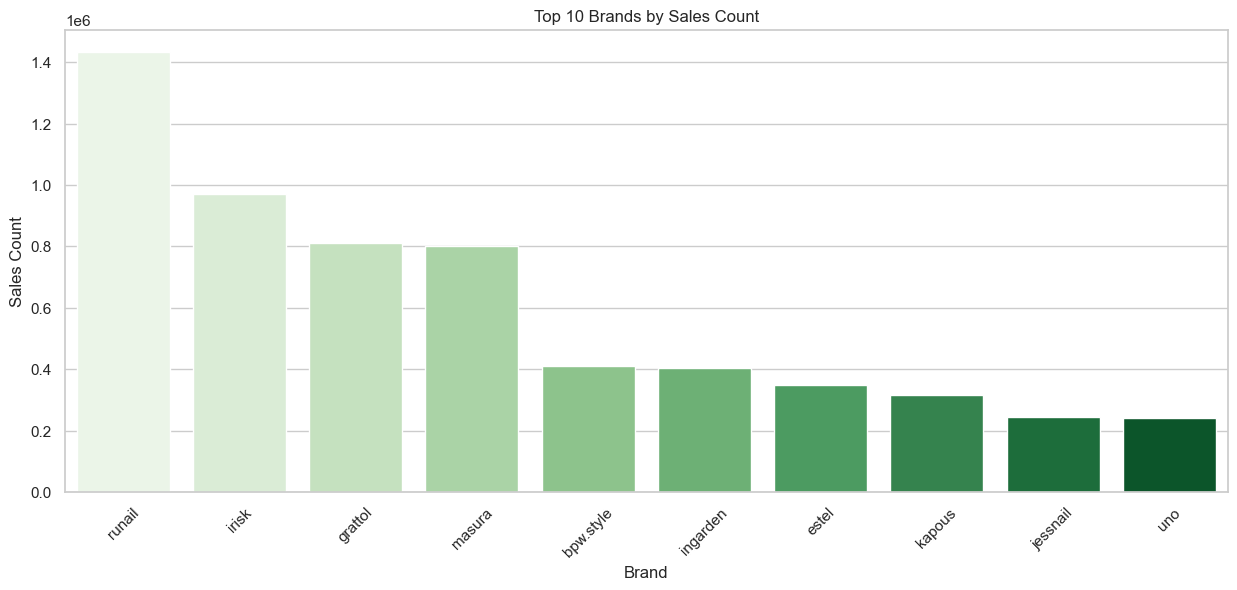

In [ ]:
# Calculate sales count for each brand
top_brands_by_sales = df['brand'].value_counts().reset_index()
top_brands_by_sales.columns = ['brand', 'sales_count']

# Display the top brands by sales count
plt.figure(figsize=(15, 6))
sns.barplot(
    data=top_brands_by_sales.head(10), 
    x='brand', 
    y='sales_count',
    palette='Greens'
    )
plt.title("Top 10 Brands by Sales Count")
plt.xlabel('Brand')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.show()


**Sales Performance of Top Brands**

**Runail's Market Leadership**: 

- Runail dominates sales with a significant margin, reinforcing its strong market presence.


**Strong Mid-Tier Performers**: 

- Irisk, Grattol, and Masura maintain solid sales performance, positioning themselves in the mid-range.

**Lower-Tier but Competitive Brands**: 

- Brands like Uno and Jessnail have lower sales but remain strong enough to rank in the Top 10.


This indicates they still hold a relevant share in the market despite lower overall sales.


In [ ]:
category_event_counts = df.groupby(['brand', 'event_type']).size().reset_index(name='count')
purchase_counts = category_event_counts[category_event_counts['event_type'] == 'purchase']
total_transaction_count = purchase_counts['count'].sum()
purchase_counts_sorted = purchase_counts.groupby('brand')['count'].sum().sort_values(ascending=False).reset_index()
category_order = purchase_counts_sorted['brand']
top_50_brands = category_order.head(50)
purchase_counts = purchase_counts[purchase_counts['brand'].isin(top_50_brands)]
purchase_counts['brand'] = pd.Categorical(purchase_counts['brand'], categories=top_50_brands, ordered=True)
purchase_counts_sorted = purchase_counts.sort_values('brand', ascending=True)
purchase_counts_sorted['cumulative_count'] = purchase_counts_sorted['count'].cumsum()
purchase_counts_sorted['cumulative_percentage'] = 100 * purchase_counts_sorted['cumulative_count'] / total_transaction_count

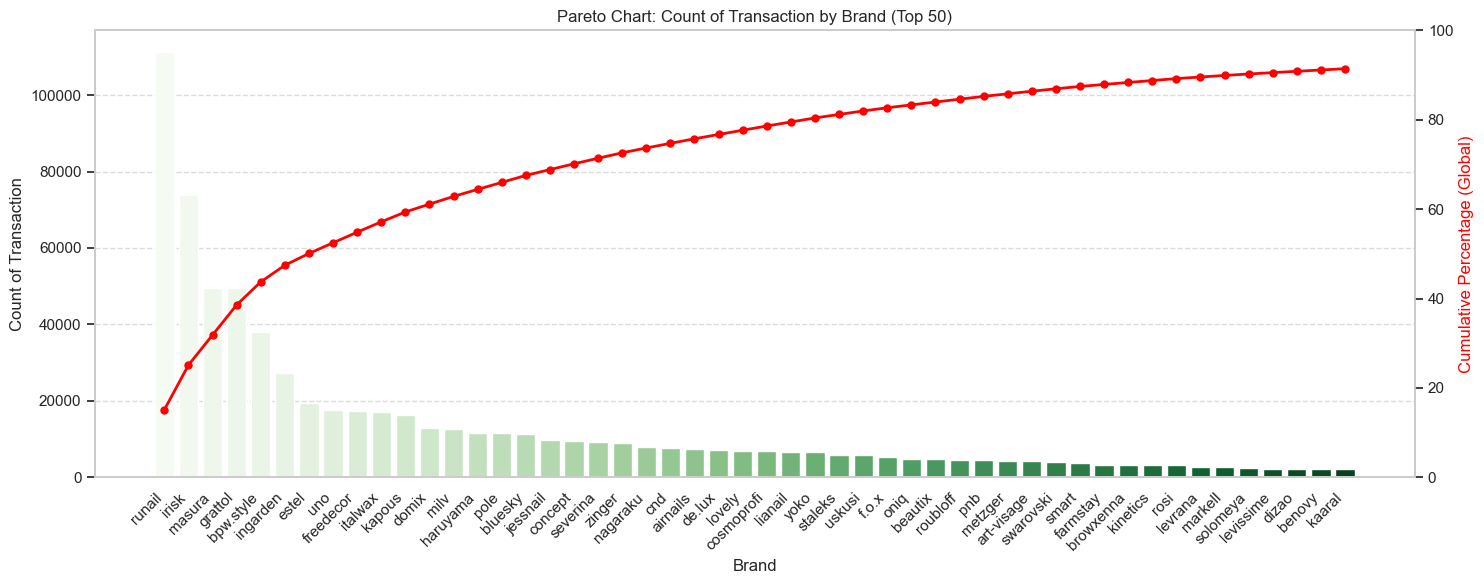

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))

sns.barplot(
    data=purchase_counts_sorted, 
    x='brand', 
    y='count', 
    palette='Greens', 
    ax=ax1
)
ax1.set_xlabel('Brand')
ax1.set_ylabel('Count of Transaction')
ax1.set_title('Pareto Chart: Count of Transaction by Brand (Top 50)')
ax2 = ax1.twinx()
ax2.plot(
    purchase_counts_sorted['brand'], 
    purchase_counts_sorted['cumulative_percentage'], 
    color='red', 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    markersize=5
)


ax2.set_ylabel('Cumulative Percentage (Global)', color='red')
ax2.set_ylim(0, 100)  # Ensure the y-axis goes from 0 to 100%
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(False)

for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

plt.tight_layout()
plt.show()


***Pareto Chart : Count of Transaction by Brand(Top 50)***

**Transaction Volume Dominance:** The highest number of transactions belongs to Runail and Irisk, significantly surpassing other brands. These two brands exhibit strong customer preference and frequent purchases.

**Cumulative Percentage:** Runail and Irisk alone account for 25% of total transactions. This indicates a high concentration of sales within a few dominant brands.

In [ ]:
category_event_counts = df.groupby(['brand', 'event_type'])['user_id'].nunique().reset_index(name='unique_users')
purchase_counts = category_event_counts[category_event_counts['event_type'] == 'purchase']
purchase_counts_sorted = purchase_counts.groupby('brand')['unique_users'].sum().sort_values(ascending=False).reset_index()
category_order = purchase_counts_sorted['brand']
purchase_counts['brand'] = pd.Categorical(purchase_counts['brand'], categories=category_order, ordered=True)
purchase_counts_sorted = purchase_counts.sort_values('brand', ascending=True)
purchase_counts_sorted['cumulative_count'] = purchase_counts_sorted['unique_users'].cumsum()
purchase_counts_sorted['cumulative_percentage'] = 100 * purchase_counts_sorted['cumulative_count'] / purchase_counts_sorted['unique_users'].sum()
top_50_brands = purchase_counts_sorted.head(50)

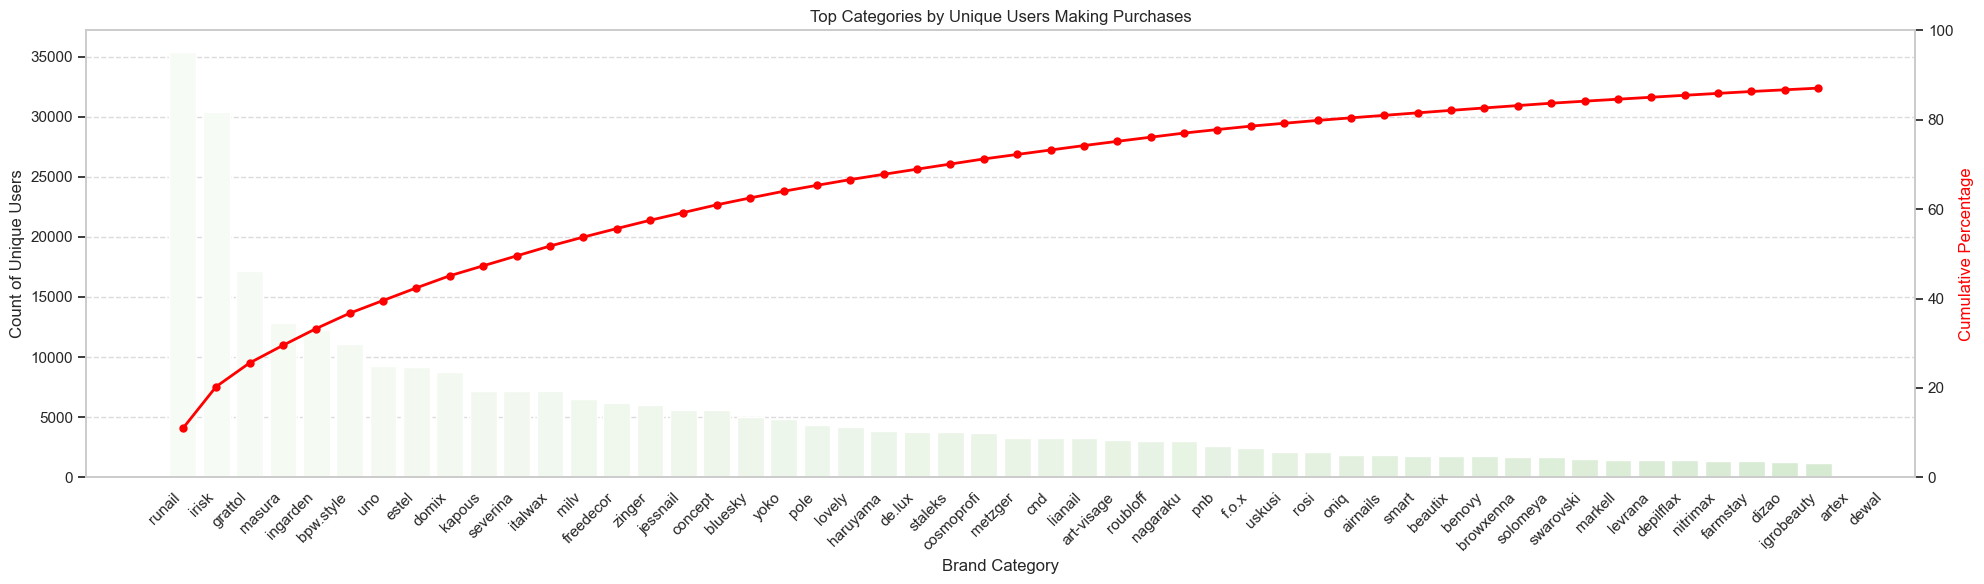

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 6))

sns.barplot(
    data=top_50_brands, 
    x='brand', 
    y='unique_users', 
    palette='Greens', 
    ax=ax1
)
ax1.set_xlabel('Brand Category')
ax1.set_ylabel('Count of Unique Users')
ax1.set_title('Top Categories by Unique Users Making Purchases')

ax2 = ax1.twinx()
ax2.plot(
    top_50_brands['brand'], 
    top_50_brands['cumulative_percentage'], 
    color='red', 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    markersize=5
)

ax2.set_ylabel('Cumulative Percentage', color='red')
ax2.set_ylim(0, 100)  # Ensure the y-axis goes from 0 to 100%

ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(False)

for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

plt.tight_layout()
plt.show()

***Top Categories by Unique Users Making Purchases***

The majority of purchases are made by a small group of highly engaged users, while most users purchase infrequently from these brands. This aligns with the Pareto principle, where a small percentage of users contribute to a large portion of total purchases. Certain brands likely have a dedicated customer base that repeatedly purchases their products. Brands with a high concentration of repeat buyers may benefit from loyalty programs and exclusive offers. Brands with a high number of one-time buyers may need to improve retention strategies, such as personalized marketing, discounts for repeat purchases, or product bundling. Understanding purchasing behavior can help businesses identify potential high-value customers and nurture them into repeat buyers.

**Insights and Recommendations for Future Strategy:**

**Prioritize Frequent Buyers:**
- Implement a loyalty program to provide incentives for repeat customers.
- Offer exclusive deals, such as special discounts or early access to new products, to frequent buyers.
- Utilize personalized marketing based on purchase history to enhance customer engagement.

**Increase Purchases from Infrequent Buyers:**
- Launch targeted marketing campaigns, such as first-time buyer discounts or tailored product recommendations.
- Utilize personalized emails or notifications with compelling offers to encourage repeat purchases.
- Implement remarketing strategies for users who have viewed products but have not completed a purchase.

### **By time**

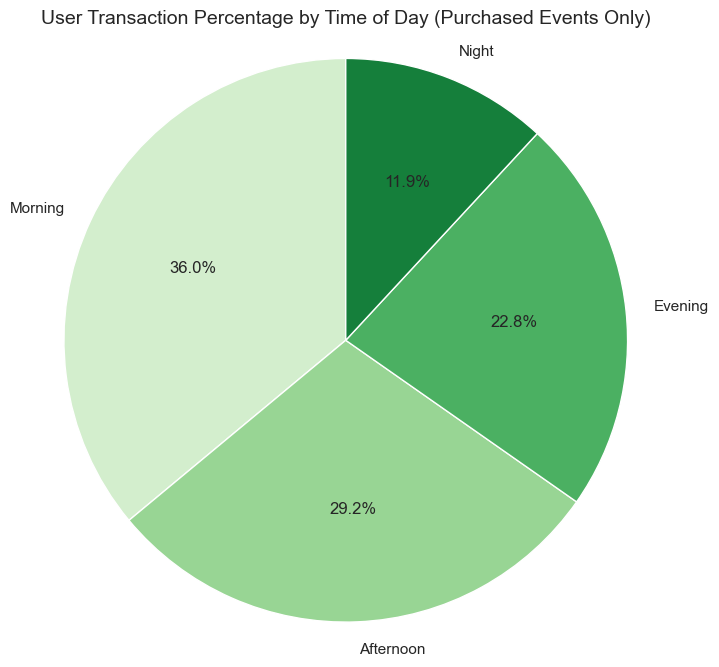

In [ ]:
def classify_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

purchase_data = df.copy()
purchase_data['time_of_day'] = df['event_time'].dt.hour.apply(classify_time_of_day)
purchase_data = purchase_data[purchase_data['event_type'] == 'purchase']

purchase_data['quantity'] = 1
activity_counts = purchase_data.groupby(['time_of_day', 'user_id']).agg(
    quantity=('quantity', 'sum'),
    price=('price', 'sum')
).reset_index()

activity_counts = activity_counts.groupby(['time_of_day'])['user_id'].count().reset_index()
total_activity = activity_counts['user_id'].sum()

activity_counts['activity_percentage'] = (activity_counts['user_id'] / total_activity) * 100
order = ['Morning', 'Afternoon', 'Evening', 'Night']
activity_counts['time_of_day'] = pd.Categorical(activity_counts['time_of_day'], categories=order, ordered=True)
activity_counts = activity_counts.sort_values(by='time_of_day')
plt.figure(figsize=(8, 8))
plt.pie(activity_counts['activity_percentage'], labels=activity_counts['time_of_day'], autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette("Greens", len(activity_counts)))

plt.title('User Transaction Percentage by Time of Day (Purchased Events Only)', fontsize=14)
plt.axis('equal')  
plt.show()


**User Transaction Percentage by Time of Day**

- **Morning (36%)** – Most transactions happen in the morning, likely as part of daily routines like shopping for essentials or paying bills.

- **Afternoon (29.2%)** – The second busiest time, as users make more purchases, possibly for personal or work-related needs.

- **Evening** – Another peak period, as people shop after finishing daily tasks or work.

- **Night** – The lowest transaction activity, likely because most people are resting or engaged in other activities.

In [ ]:
def classify_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'


purchase_data = df.copy()
purchase_data['time_of_day'] = purchase_data['event_time'].dt.hour.apply(classify_time_of_day)
purchase_data = purchase_data[purchase_data['event_type'] == 'purchase']
purchase_data['quantity'] = 1

purchase_data = purchase_data.groupby(['time_of_day', 'user_id']).agg(
    quantity=('quantity', 'sum'),
    price=('price', 'sum')
).reset_index()

bins = [0, 50, 100, 500, 1000, float('inf')]
labels = ['< 50', '50-100', '100-500', '500-1000', '> 1000']
purchase_data['PriceRange'] = pd.cut(purchase_data['price'], bins=bins, labels=labels, right=False)

activity_counts = purchase_data.groupby(['time_of_day', 'PriceRange'])['user_id'].count().reset_index()
activity_counts.columns = ['time_of_day', 'PriceRange', 'activity_count']
total_activity_by_time_of_day = activity_counts.groupby('time_of_day')['activity_count'].transform('sum')
activity_counts['activity_percentage'] = (activity_counts['activity_count'] / total_activity_by_time_of_day) * 100
activity_counts = activity_counts.sort_values(by=['time_of_day', 'PriceRange'])
order = ['Morning', 'Afternoon', 'Evening', 'Night']
activity_counts['time_of_day'] = pd.Categorical(activity_counts['time_of_day'], categories=order, ordered=True)
activity_counts = activity_counts.sort_values(by='time_of_day')

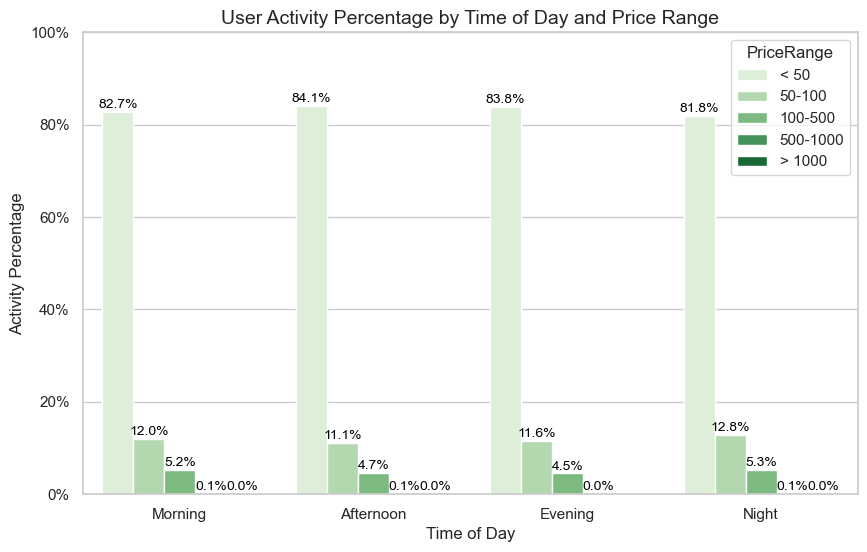

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(data=activity_counts, x='time_of_day', y='activity_percentage', hue='PriceRange', palette="Greens")

plt.title('User Activity Percentage by Time of Day and Price Range', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Activity Percentage', fontsize=12)
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(PercentFormatter())

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        plt.gca().annotate(f'{height:.1f}%', 
                           (p.get_x() + p.get_width() / 2., height), 
                           ha='center', va='center', 
                           fontsize=10, color='black', 
                           xytext=(0, 5), textcoords='offset points')

plt.show()

**User Activity by Time of Day and Price Range**

- **Morning Preference** – Users tend to shop more in the morning, mostly for lower-priced items.

- **Consistent Activity** – There is no significant difference in user activity across morning, afternoon, evening, and night, indicating that time does not strongly impact shopping behavior.

- **Price Segment** – Most transactions fall within the under $50 price range across all time periods, showing that affordable cosmetics are highly preferred by customers.

### **By Churn**

In [ ]:
dff = df.copy()
dff = dff[dff['event_type'] == 'purchase']
dff['quantity'] = 1
dff = dff.groupby(['event_time', 'user_id']).agg(
    quantity=('quantity', 'sum'),
    price=('price', 'sum')
).reset_index()

In [ ]:
dff = dff.groupby('user_id')['event_time'].agg(['min', 'max']).reset_index()
dff['purchase_range'] = (dff['max'] - dff['min']).dt.days

In [ ]:
dff[dff['purchase_range']>0].describe()

user_id  purchase_range
count  1.977400e+04    19774.000000
mean   4.967256e+08       55.746435
std    9.485939e+07       39.755690
min    1.028034e+07        1.000000
25%    4.503826e+08       21.000000
50%    5.288896e+08       49.000000
75%    5.641176e+08       87.000000
max    6.214410e+08      151.000000

In [ ]:
purchase_data = df.copy()
purchase_data['event_date'] = purchase_data['event_time'].dt.date
purchase_data = purchase_data[purchase_data['event_type'] == 'purchase']
purchase_data['quantity'] = 1
purchase_data = purchase_data.groupby(['event_date', 'user_id']).agg(
    quantity=('quantity', 'sum'),
    price=('price', 'sum')
).reset_index()

In [ ]:
analysis_date = purchase_data['event_date'].max()
rfm = purchase_data.groupby('user_id').agg(
    recency=('event_date', lambda x: (analysis_date - x.max()).days),
    frequency=('event_date', 'count'),  
    monetary_value=('price', 'sum')  
).reset_index()

churn_threshold = 50
rfm['churned'] = np.where(rfm['recency'] > churn_threshold, 1, 0)

In [ ]:
rfm['churned'].value_counts().reset_index()

churned  count
0        1  58582
1        0  39876

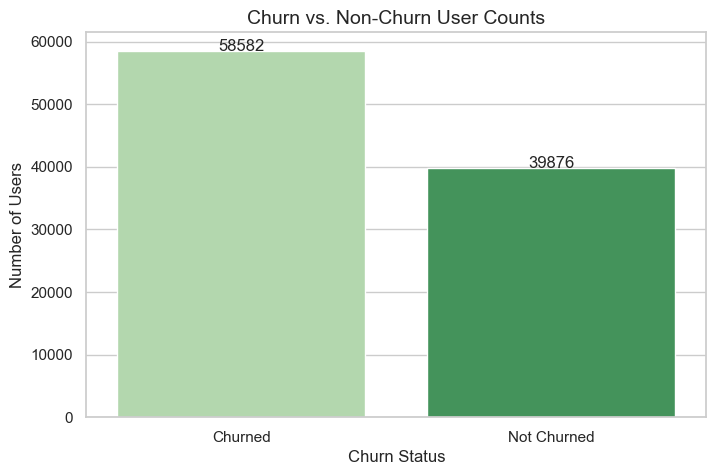

In [ ]:
plt.figure(figsize=(8, 5))
churn_counts_df = rfm['churned'].value_counts().reset_index()
churn_counts_df.columns = ['Churn Status', 'User Count']


for index, row in churn_counts_df.iterrows():
    plt.text(index, row['User Count'] + 10, str(row['User Count']), ha='center', fontsize=12)
churn_counts_df['Churn Status'] = churn_counts_df['Churn Status'].map({0: 'Not Churned', 1: 'Churned'})
sns.barplot(data=churn_counts_df, x='Churn Status', y='User Count', palette="Greens")
plt.title('Churn vs. Non-Churn User Counts', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=0)
plt.show()

**User didefinisikan churn apabila sudah tidak melakukan transaksi dari 50 hari karena setelah dicek, rata2 user melakukan transaksi dari event type_view ke purchase 60 hari dan rata2 user yang tidak melakukan transaksi sebesar 55 hari**

***Churn vs Non-Churn User Counts***

A high churn rate suggests a serious retention issue, with more users leaving than staying. This could impact revenue as loyal customers are lost.

Several factors may contribute to this. Product quality issues like inaccurate colors or uncomfortable textures, limited variety, or high prices compared to competitors could drive customers away. The shopping experience also matters—poor customer service, difficult returns, or an uninviting store layout can discourage repeat purchases.

Competitors may also be attracting customers with lower prices, better promotions, or more innovative products. To reduce churn, businesses should focus on improving product quality, enhancing customer service, and offering competitive pricing.

In [ ]:
purchased = df.copy()
purchased= purchased[purchased['event_type']=='purchase']
purchased['event_month'] = purchased['event_time'].dt.to_period('M')

In [ ]:
def first_churn_month(group):
    churned_months = group[group['churned'] == 1]['event_month']
    return churned_months.min() if len(churned_months) > 0 else None

In [ ]:
first_churn_months = rfm.merge(
    purchased[['user_id', 'event_month']], 
    on='user_id'
).groupby('user_id').apply(first_churn_month).reset_index()
first_churn_months.columns = ['user_id', 'first_churn_month']

In [ ]:
first_churn_months

user_id first_churn_month
0        9794320           2019-11
1       10079204           2019-11
2       10280338               NaT
3       12055855           2019-12
4       12936739               NaT
...          ...               ...
98453  622065819               NaT
98454  622066161               NaT
98455  622067983               NaT
98456  622069477               NaT
98457  622073202               NaT

[98458 rows x 2 columns]

In [ ]:
churn_by_first_month = first_churn_months.groupby('first_churn_month').size().reset_index(name='churned_users')

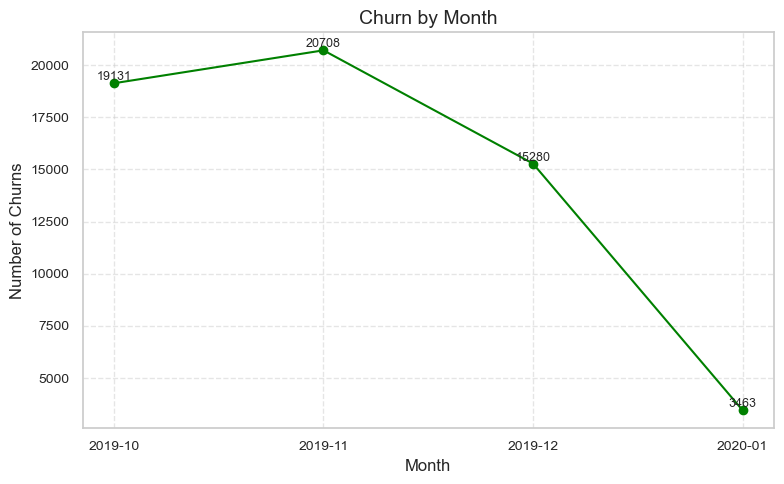

In [ ]:
plt.figure(figsize=(8, 5))
line = plt.plot(
    churn_by_first_month['first_churn_month'].astype(str), 
    churn_by_first_month['churned_users'], 
    marker='o', 
    color='green'  
)
plt.title('Churn by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Churns', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)  

for x, y in zip(churn_by_first_month['first_churn_month'].astype(str), churn_by_first_month['churned_users']):
    plt.text(x, y, str(y), 
             ha='center',   
             va='bottom',   
             fontsize=9)   

plt.show()

User churn peaked in November, followed by a significant decline from November 2019 to January 2020, indicating improved customer retention. However, there was a slight increase in churn from October to November, suggesting a need for further analysis to understand the factors driving this trend.


## **Cohort Analysis**

### **By Price and Quantity**

In [ ]:
df_retensi = df.iloc[:, [0, 1, 2, 5, 6]]
df_retensi.columns

Index(['event_time', 'event_type', 'product_id', 'price', 'user_id'], dtype='object')

In [ ]:
df_retensi = df[df['event_type']=='purchase']

In [ ]:
# df_retensi['event_time'] = pd.to_datetime(df_retensi['event_time'], format='%m/%d/%Y %H:%M')
df_retensi['event_date'] = df_retensi['event_time'].dt.date
df_retensi['quantity']= 1
df_retensi = df_retensi.groupby(['event_date', 'user_id']).agg(
    quantity=('quantity', 'sum'),
    price=('price', 'sum')
).reset_index()

In [ ]:
def get_month(x): return dt.datetime(x.year, x.month, 1)
df_retensi['InvoiceMonth'] = df_retensi['event_date'].apply(get_month)
grouping = df_retensi.groupby('user_id')['InvoiceMonth']
df_retensi['CohortMonth'] = grouping.transform('min')

In [ ]:
def get_date_int(df_retensi, column):
    year = df_retensi[column].dt.year
    month = df_retensi[column].dt.month
    day = df_retensi[column].dt.day
    return year, month, day

In [ ]:
invoice_year, invoice_month, invoice_day = get_date_int(df_retensi, 'InvoiceMonth')
cohort_year, cohort_month, cohort_day = get_date_int(df_retensi, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df_retensi['CohortIndex'] = years_diff * 12 + months_diff + 1

df_retensi.tail()

event_date    user_id  quantity  price InvoiceMonth CohortMonth  \
137064  2020-02-29  622065819         4  20.48   2020-02-01  2020-02-01   
137065  2020-02-29  622066161         4  12.95   2020-02-01  2020-02-01   
137066  2020-02-29  622067983         4  29.33   2020-02-01  2020-02-01   
137067  2020-02-29  622069477         1   0.95   2020-02-01  2020-02-01   
137068  2020-02-29  622073202         1   3.81   2020-02-01  2020-02-01   

        CohortIndex  
137064            1  
137065            1  
137066            1  
137067            1  
137068            1

In [ ]:
grouping = df_retensi.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping['user_id'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='user_id')

In [ ]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index=retention.index.date

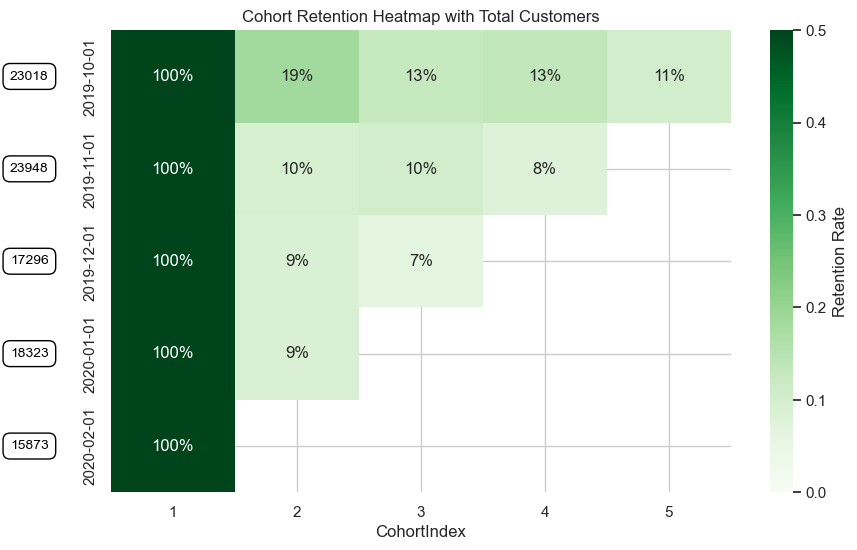

In [ ]:
total_customers = cohort_counts.iloc[:, 0].astype(int)  
retention_with_totals = retention.copy()
retention_with_totals.insert(0, 'Total Customers', total_customers)
plt.figure(figsize=(10, 6))
plt.title('Cohort Retention Heatmap with Total Customers')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index (Months Since First Purchase)')

sns.heatmap(data=retention_with_totals.iloc[:, 1:],  annot=True,fmt='.0%',  vmin=0.0,vmax=0.5,cmap='Greens',cbar_kws={'label': 'Retention Rate'})

for y, total in enumerate(total_customers):
    plt.text(
        -0.5,  
        y + 0.5,  
        f'{total}',  
        ha='right',  
        va='center',  
        color='black',  
        fontsize=10,  
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

Customer retention drops significantly after the first month across all cohorts, indicating challenges in retaining new users. After the initial decline, retention rates tend to stabilize, suggesting ongoing factors affecting early churn. While each cohort starts with a different number of customers, the retention pattern remains similar, implying that the underlying issues are widespread rather than cohort-specific. This decline may be due to a lack of innovation in competing with other cosmetic brands.

### **By Price Range**

In [ ]:
data = df.copy()
data = data[data['event_type']=='purchase']
data['event_date'] = data['event_time'].dt.date
data['quantity'] = 1
df_price_cohort = data.groupby(['event_date', 'user_id']).agg(
    quantity=('quantity', 'sum'),
    total_price=('price', 'sum')
).reset_index()

In [ ]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

df_price_cohort['event_date'] = pd.to_datetime(df_price_cohort['event_date'])
df_price_cohort['InvoiceMonth'] = df_price_cohort['event_date'].apply(get_month)
grouping = df_price_cohort.groupby('user_id')['InvoiceMonth']
df_price_cohort['CohortMonth'] = grouping.transform('min')

def get_date_int(dataframe, column):
    year = dataframe[column].dt.year
    month = dataframe[column].dt.month
    day = dataframe[column].dt.day
    return year, month, day

invoice_year, invoice_month, _ = get_date_int(df_price_cohort, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df_price_cohort, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
df_price_cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

bins = [0, 50, 100, 500, 1000, float('inf')]
labels = ['< 50', '50-100', '100-500', '500-1000', '> 1000']
df_price_cohort['PriceRange'] = pd.cut(df_price_cohort['total_price'], bins=bins, labels=labels, right=False)

Price Range: < 50


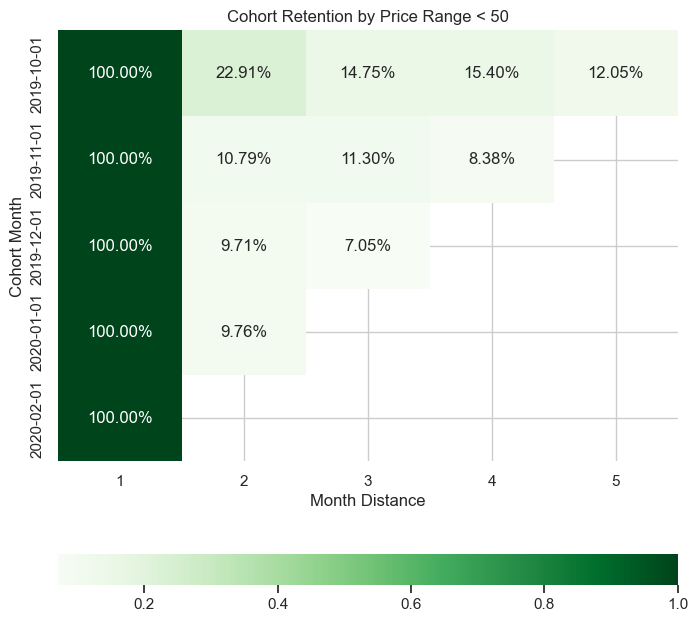

Price Range: 50-100


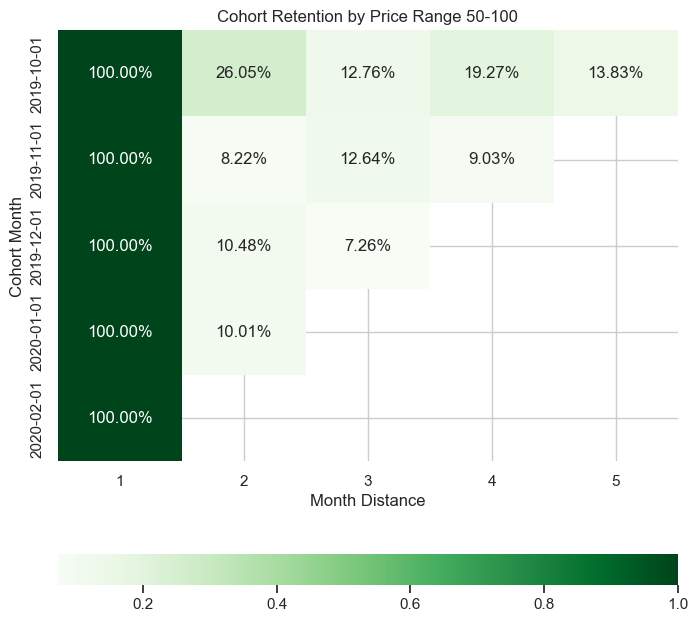

Price Range: 100-500


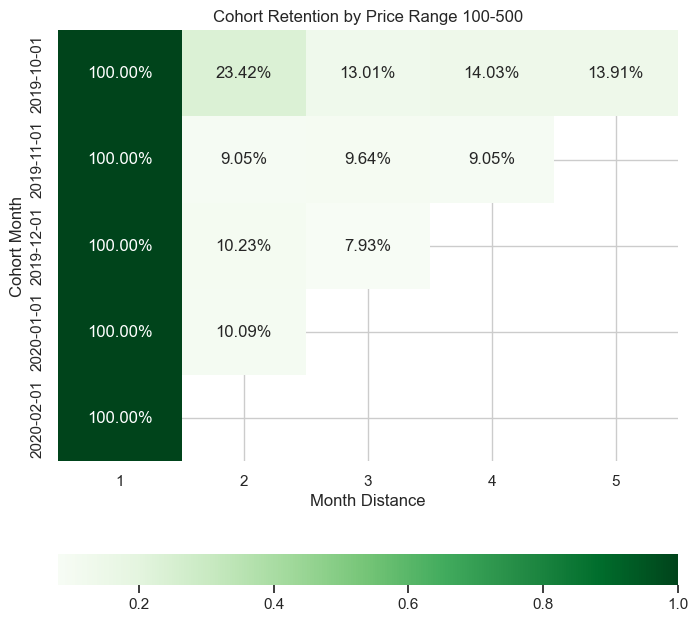

Price Range: 500-1000


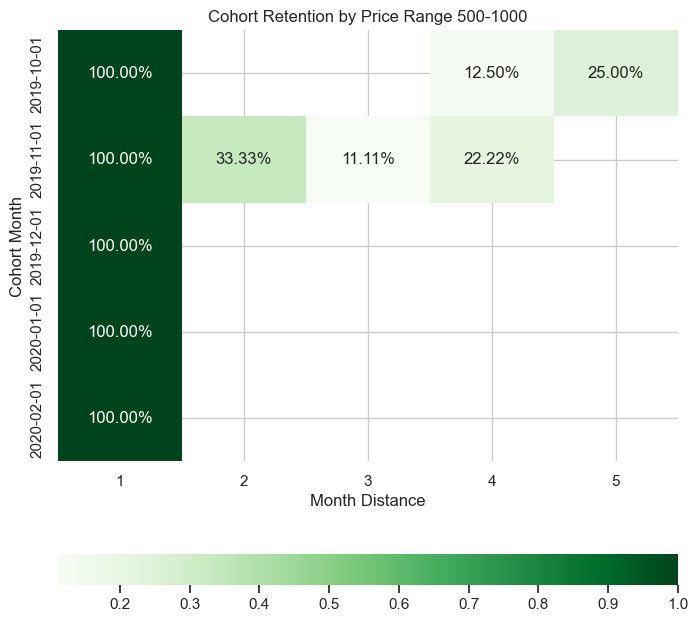

No data for Price Range: > 1000


In [ ]:
for i in labels:
    df_category = df_price_cohort[df_price_cohort["PriceRange"] == i]
    if df_category.empty:
        print(f"No data for Price Range: {i}")
        continue
    price_range_group = df_category.groupby(['CohortMonth', 'CohortIndex'])['user_id'].count().reset_index()
    cohort_retention_pivot = price_range_group.pivot(index='CohortMonth', columns='CohortIndex', values='user_id')
    if cohort_retention_pivot.empty or cohort_retention_pivot.shape[1] == 0:
        print(f"No retention data for Price Range: {i}")
        continue
    price_range_retention = cohort_retention_pivot.divide(cohort_retention_pivot.iloc[:, 0], axis=0)
    try:
        price_range_retention.index = price_range_retention.index.date
    except AttributeError:
        pass
        
    price_range_group_sorted = price_range_group.sort_values(by='CohortMonth')
    print(f"Price Range: {i}")
    plt.figure(figsize=(8, 8))
    sns.heatmap(data=price_range_retention, annot=True, fmt='.2%',
                cbar_kws={'orientation': 'horizontal'},
                cmap='Greens')
    plt.title(f'Cohort Retention by Price Range {i}')
    plt.xlabel('Month Distance')
    plt.ylabel('Cohort Month')
    plt.show()

**Strong Initial Retention**: All cohorts start with a 100% retention rate in the first month, indicating that the product is highly appealing and successfully attracts new users.

**Significant Drop in Retention**: After the first month, retention declines sharply across all cohorts, highlighting challenges in maintaining customer engagement after the initial purchase.

**Retention Increases**: For all price ranges except $500–$1000, there is an increase in retention in period 5 (October 2019 cohort) and period 4 (November 2019 cohort). For purchases under $500, retention improves in period 4 for October 2019 and period 3 for November 2019. Notably, the $500–$1000 price range experiences a sharp retention increase, doubling in period 5 

### **By Brand Category**

#### **Statistics**

To see wether each category count values are indeed different -> to see if its relevant to analyze them based on category

In [ ]:
from scipy.stats import shapiro

category_order = ['Nail Care', 'Skin Care', 'Professional Tools', 'Beauty & Cosmetics', 'Hair Care']
anova_counts = df.groupby(['event_type', 'brand', 'brand_category']).size().reset_index(name='count')

for category in category_order:
    stat, p = shapiro(anova_counts[anova_counts['brand_category'] == category]['count'])
    if p <= 0.05:
        print(f"p-value = {p:.5f}. Data kategori {category} tidak normal.")
    else:
        print(f"p-value = {p:.5f}. Data kategori {category} normal.")

p-value = 0.00000. Data kategori Nail Care tidak normal.
p-value = 0.00000. Data kategori Skin Care tidak normal.
p-value = 0.00000. Data kategori Professional Tools tidak normal.
p-value = 0.00000. Data kategori Beauty & Cosmetics tidak normal.
p-value = 0.00000. Data kategori Hair Care tidak normal.


`Assumption`: Testing whether there is a difference in the median number of 'purchase' transactions across categories.

`Hypothesis`  

$H_{0} = M_{1} = M_{2} = . . . = M_{8}$

$H_{a} =$ There is at least one pair of categories with a significant difference in their median prices.

`Significance`

$\alpha = 0.05$

`Conclusion Decision Criteria`

- p-value $\leq \alpha$ : Reject $H_{0}$
- p-value $> \alpha$ : Failed to Reject $H_{0}$

In [ ]:
from scipy.stats import kruskal

stat, pval = kruskal(
    anova_counts[(anova_counts['brand_category'] == 'Nail Care') & (anova_counts['event_type'] == 'purchase')]['count'],
    anova_counts[(anova_counts['brand_category'] == 'Skin Care') & (anova_counts['event_type'] == 'purchase')]['count'],
    anova_counts[(anova_counts['brand_category'] == 'Professional Tools') & (anova_counts['event_type'] == 'purchase')]['count'],
    anova_counts[(anova_counts['brand_category'] == 'Beauty & Cosmetics') & (anova_counts['event_type'] == 'purchase')]['count'],
    anova_counts[(anova_counts['brand_category'] == 'Hair Care') & (anova_counts['event_type'] == 'purchase')]['count']
    )

if pval <= 0.05:
    print(f"H₀ ditolak, p-value = {pval} atau <= 0.05. Ada cukup bukti untuk menyatakan bahwa distribusi nilai antar kategori berbeda.")
else:
    print(f"H₀ diterima, p-value = {pval} atau > 0.05. Tidak ada cukup bukti untuk menyatakan bahwa distribusi nilai antar kategori berbedaa.")

H₀ ditolak, p-value = 1.19577578676473e-06 atau <= 0.05. Ada cukup bukti untuk menyatakan bahwa distribusi nilai antar kategori berbeda.


Based on the ANOVA results, we can conclude that category is relevant enough to be used in cohort analysis, as there is a significant difference in the average transactions across categories.

This indicates that brand category is not just a random attribute but a variable that influences data patterns. In other words, each category has unique characteristics that can be leveraged for further analysis, such as customer retention strategies or market segmentation.

#### **All Brand Category Data**

In [ ]:
df["brand_category"].unique()

array(['Nail Care', 'Skin Care', 'Professional Tools',
       'Beauty & Cosmetics', 'Technology', 'Hair Care',
       'Jewelry & Accessories', 'Foot Care', 'Oral Care'], dtype=object)

#### **Group By Quantity**

array(['remove_from_cart', 'view', 'cart', 'purchase'], dtype=object)

array(['Nail Care', 'Skin Care', 'Professional Tools',
       'Beauty & Cosmetics', 'Technology', 'Hair Care',
       'Jewelry & Accessories', 'Foot Care', 'Oral Care'], dtype=object)

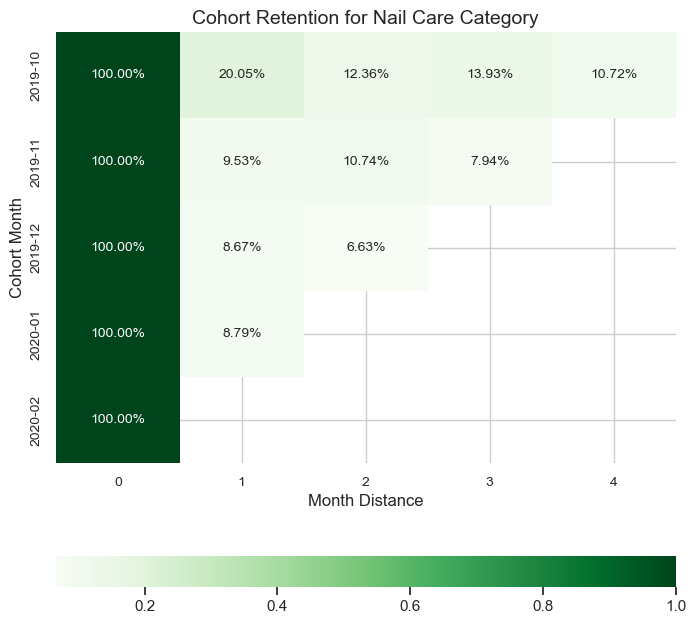

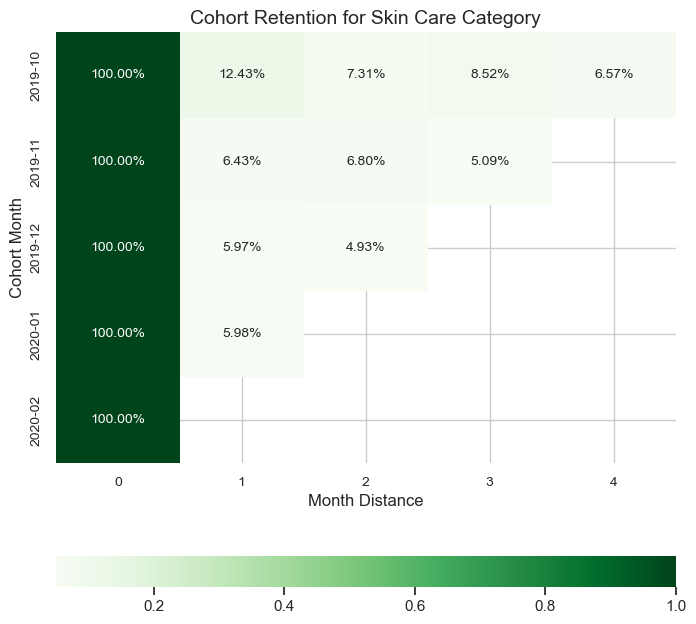

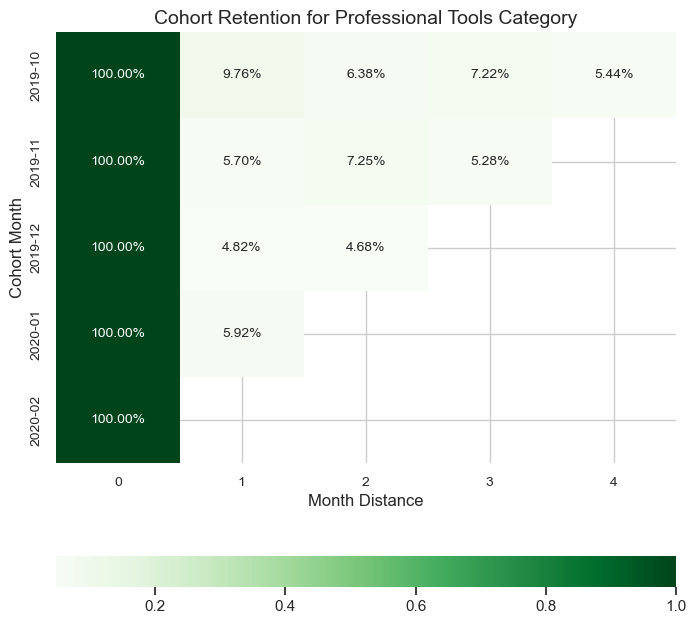

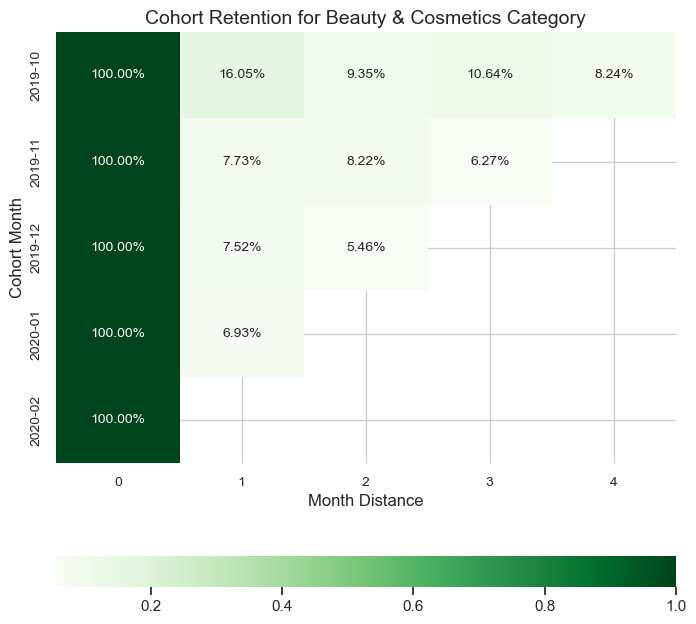

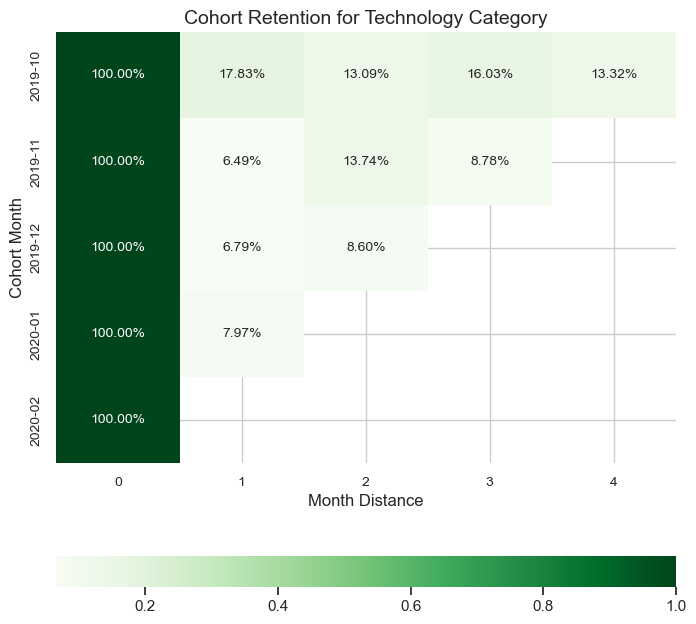

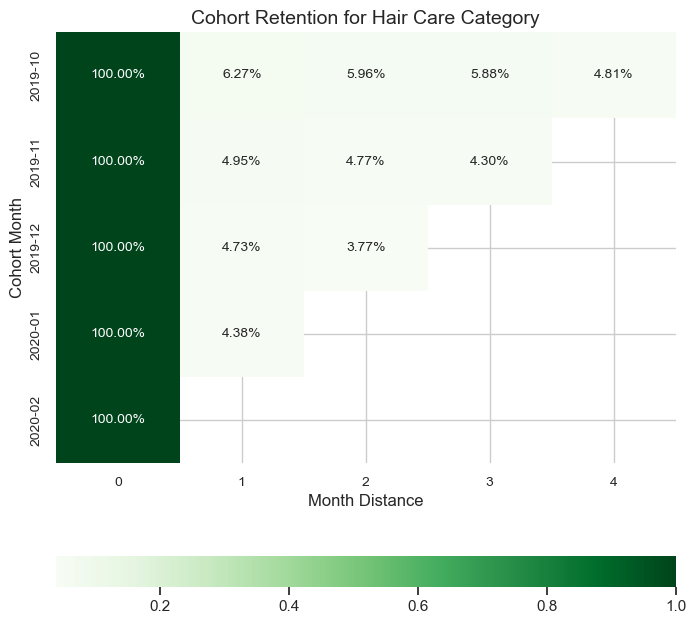

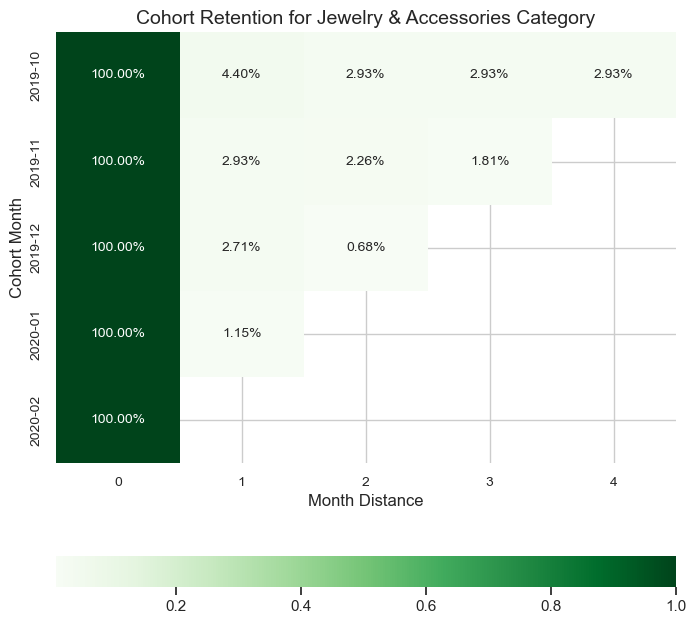

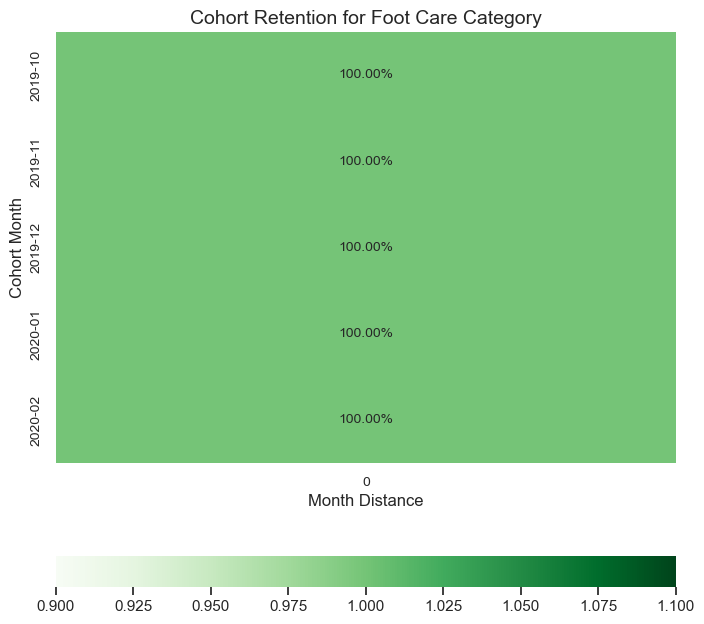

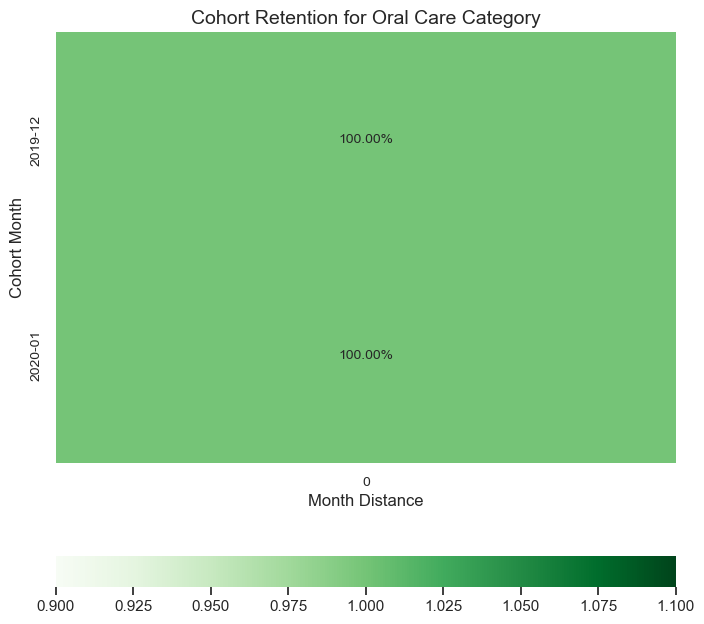

In [ ]:
display(df["event_type"].unique())
display(df["brand_category"].unique())


category_order = ['Nail Care', 'Skin Care', 'Professional Tools', 'Beauty & Cosmetics', 'Technology', 'Hair Care', 'Jewelry & Accessories', 'Foot Care', 'Oral Care']

# Loop over filtered categories
for i in category_order:
    df_category = df[(df["event_type"] == 'purchase') & (df["brand_category"] == i)]

    # Step 2: Define cohort_month and current_transaction_month
    df_category['quantity'] = 1
    # Define cohort_month based on the first transaction (earliest event_time)
    df_category["cohort_month"] = df_category.groupby('user_id')['event_time'].transform('min').dt.to_period('M')
    df_category["current_transaction_month"] = df_category['event_time'].dt.to_period('M')

    # Step 3: Aggregation to get cohort retention count
    cohort_retention = df_category.groupby(['cohort_month', 'current_transaction_month'])['user_id'].nunique().reset_index().rename(columns={'user_id': 'count_user'})
    
    # Step 4: Calculate period_distance (month distance)
    cohort_retention['period_distance'] = (
        (cohort_retention['current_transaction_month'].dt.year - cohort_retention['cohort_month'].dt.year) * 12 + 
        (cohort_retention['current_transaction_month'].dt.month - cohort_retention['cohort_month'].dt.month)
    )

    # Step 5: Pivot the data for heatmap visualization
    cohort_retention_pivot = cohort_retention.pivot_table(index='cohort_month', columns='period_distance', values='count_user', aggfunc='sum')
    
    # Step 6: Calculate cohort retention by dividing each period by the first month's cohort size
    cohort_retention_final = cohort_retention_pivot.divide(cohort_retention_pivot.iloc[:, 0], axis=0)

    # Plotting the heatmap
    plt.figure(figsize=(8, 8))
    sns.heatmap(data=cohort_retention_final, annot=True, fmt='.2%', cmap='Greens', cbar_kws={'orientation': 'horizontal'}, annot_kws={"size": 10})
    plt.title(f'Cohort Retention for {i} Category', fontsize=14)
    plt.xlabel('Month Distance', fontsize=12)
    plt.ylabel('Cohort Month', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

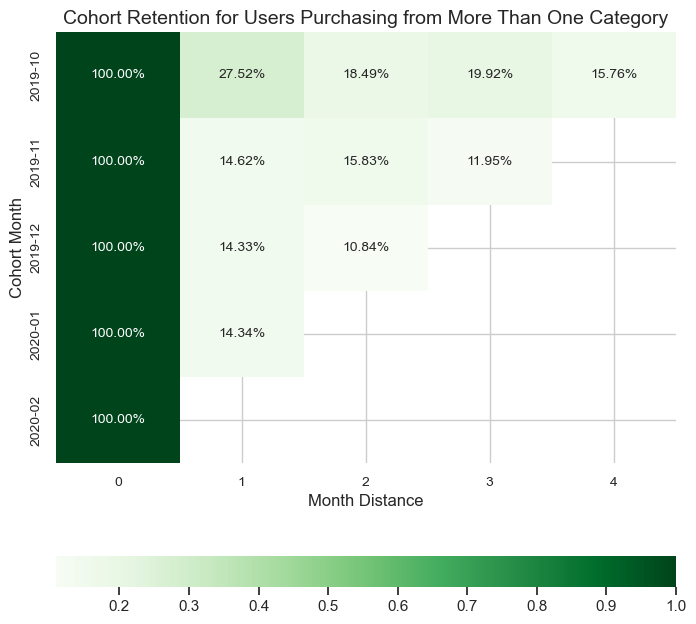

In [ ]:
# Step 1: Filter the data to only include 'purchase' events and users who purchased from more than one category
purchase_data = df[df['event_type'] == 'purchase']
user_categories = purchase_data.groupby('user_id')['brand_category'].nunique()
users_multiple_categories = user_categories[user_categories > 1].index
filtered_data = purchase_data[purchase_data['user_id'].isin(users_multiple_categories)]

# Step 2: Define cohort_month and current_transaction_month
filtered_data['quantity'] = 1
# Define cohort_month based on the first transaction (earliest event_time)
filtered_data["cohort_month"] = filtered_data.groupby('user_id')['event_time'].transform('min').dt.to_period('M')
filtered_data["current_transaction_month"] = filtered_data['event_time'].dt.to_period('M')

# Step 3: Aggregation to get cohort retention count
cohort_retention = filtered_data.groupby(['cohort_month', 'current_transaction_month'])['user_id'].nunique().reset_index().rename(columns={'user_id': 'count_user'})

# Step 4: Calculate period_distance (month distance)
cohort_retention['period_distance'] = (
    (cohort_retention['current_transaction_month'].dt.year - cohort_retention['cohort_month'].dt.year) * 12 + 
    (cohort_retention['current_transaction_month'].dt.month - cohort_retention['cohort_month'].dt.month)
)

# Step 5: Pivot the data for heatmap visualization
cohort_retention_pivot = cohort_retention.pivot_table(index='cohort_month', columns='period_distance', values='count_user', aggfunc='sum')

# Step 6: Calculate cohort retention by dividing each period by the first month's cohort size
cohort_retention_final = cohort_retention_pivot.divide(cohort_retention_pivot.iloc[:, 0], axis=0)

# Plotting the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(data=cohort_retention_final, annot=True, fmt='.2%', cmap='Greens', cbar_kws={'orientation': 'horizontal'}, annot_kws={"size": 10})
plt.title('Cohort Retention for Users Purchasing from More Than One Category', fontsize=14)
plt.xlabel('Month Distance', fontsize=12)
plt.ylabel('Cohort Month', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
